# 4 Wheeler EV User Review Dataset-Analysis & Segmentation
### By Simar Ahuja

## Importing Libraries

In [1]:
import pandas as pd
import warnings
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans

## Importing Dataset

In [2]:
df = pd.read_csv('4-wheeler-EV-carwale.csv')
df.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [34]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    float64
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
 10  KmeansLabels     129 non-null    int32  
dtypes: float64(7), int32(1), object(3)
memory usage: 10.7+ KB


## Exploratory Data Analysis(EDA)

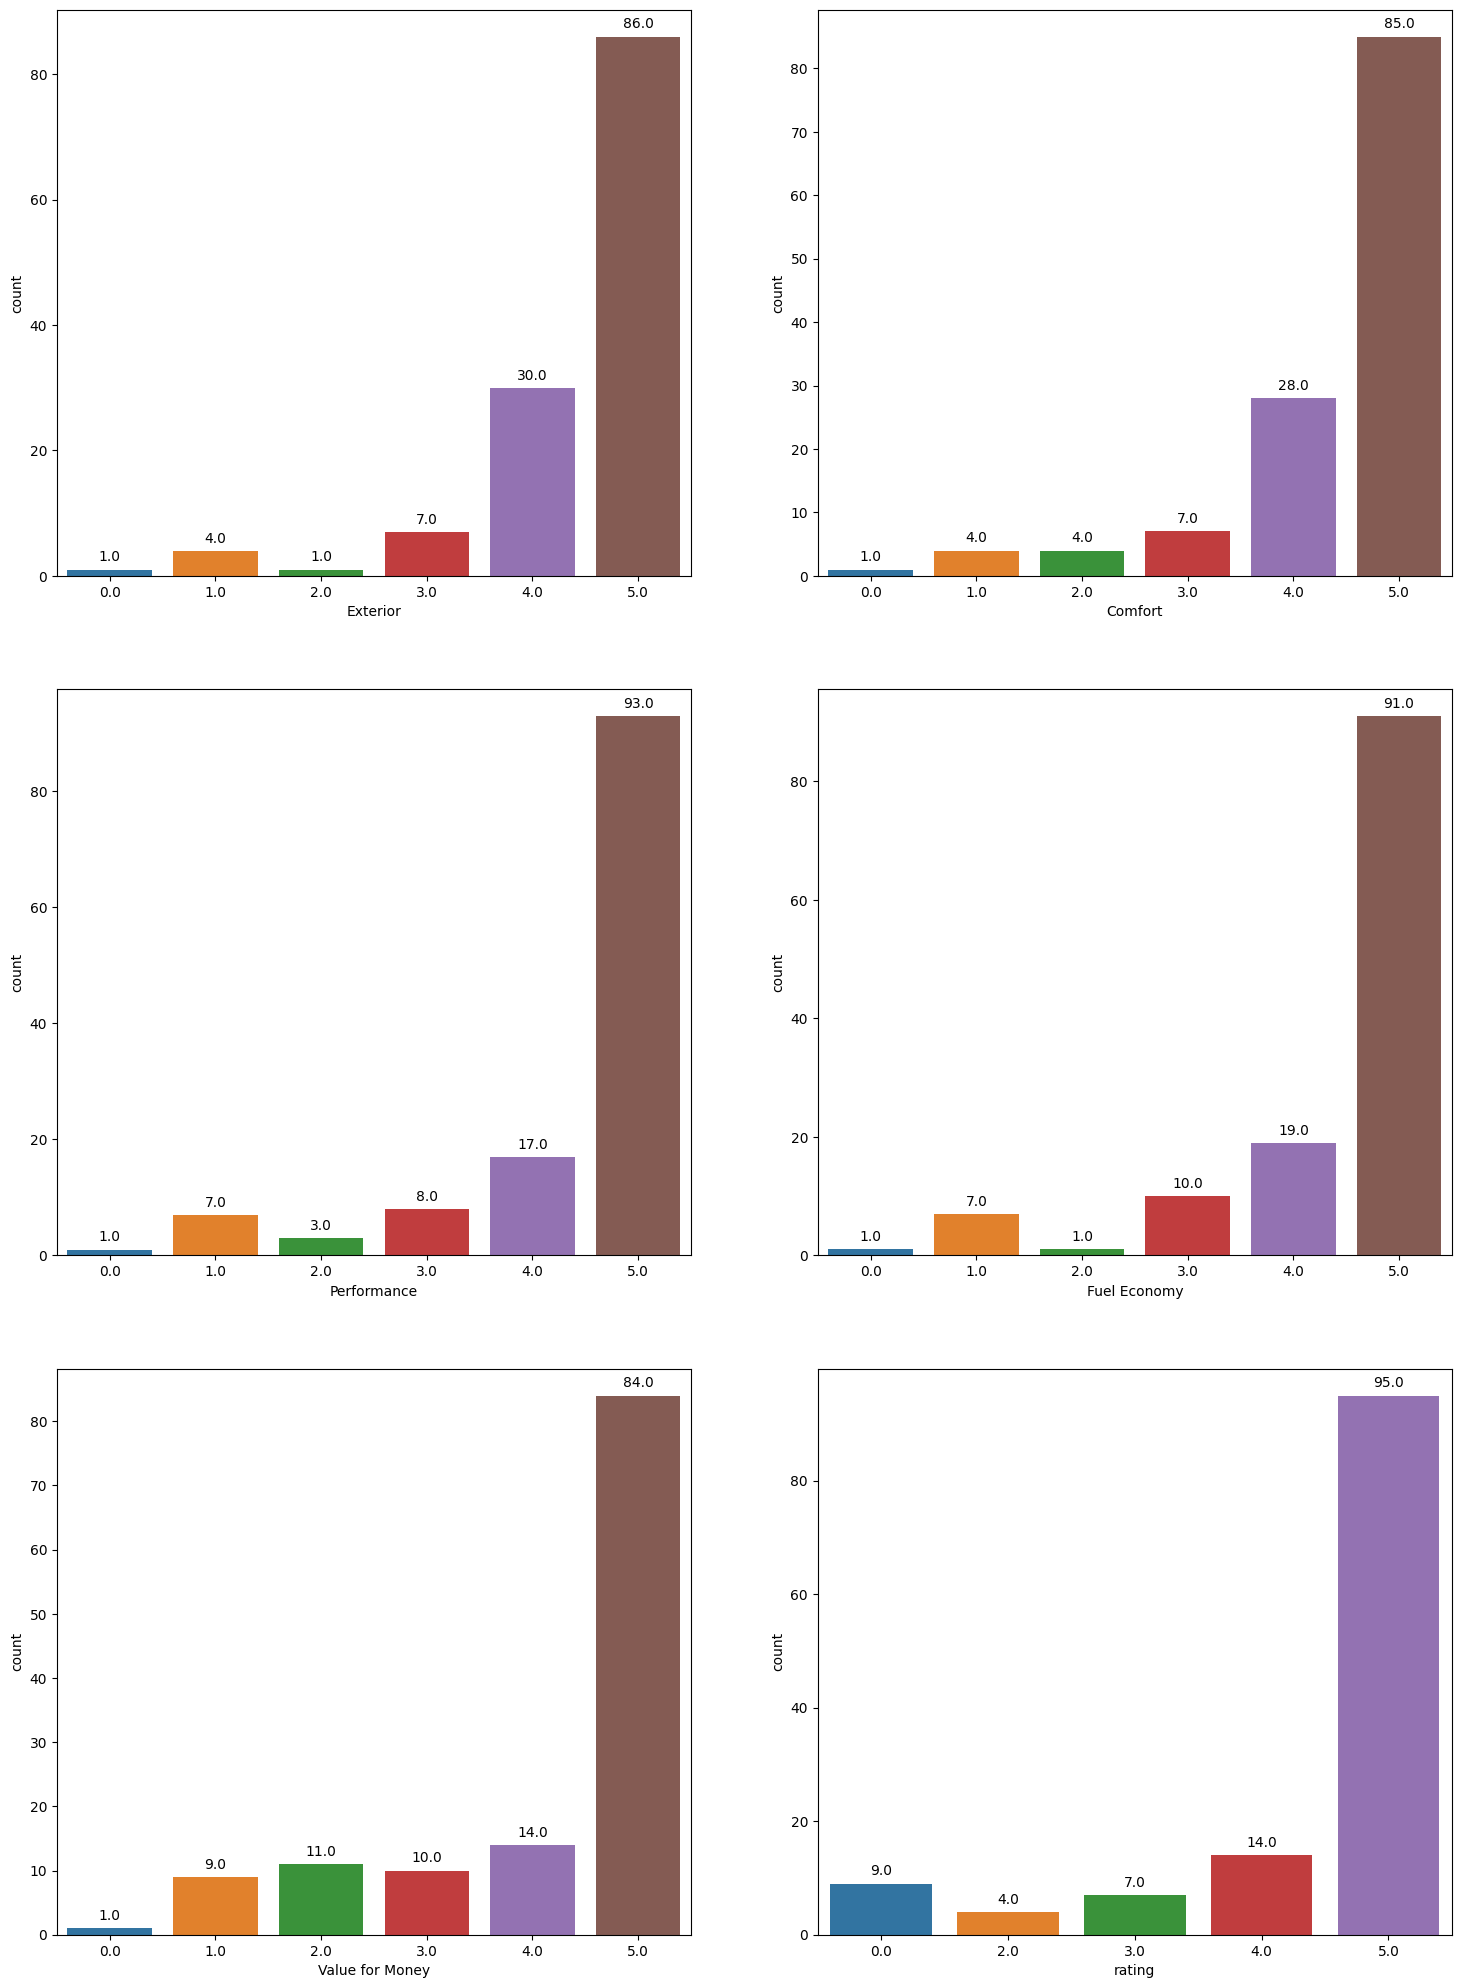

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 25))

splot = sns.countplot(data = df,x='Exterior', ax=axes[0][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Comfort', ax=axes[0][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Performance', ax=axes[1][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Fuel Economy', ax=axes[1][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Value for Money', ax=axes[2][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='rating', ax=axes[2][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

People's concerns for EVs are regarding Exterior, Comfort, Performance and Fuel Economy.

People seem to be very positive about every aspect of EVs

## Specifying the Ideal Target Segment

<Axes: xlabel='count', ylabel='driven'>

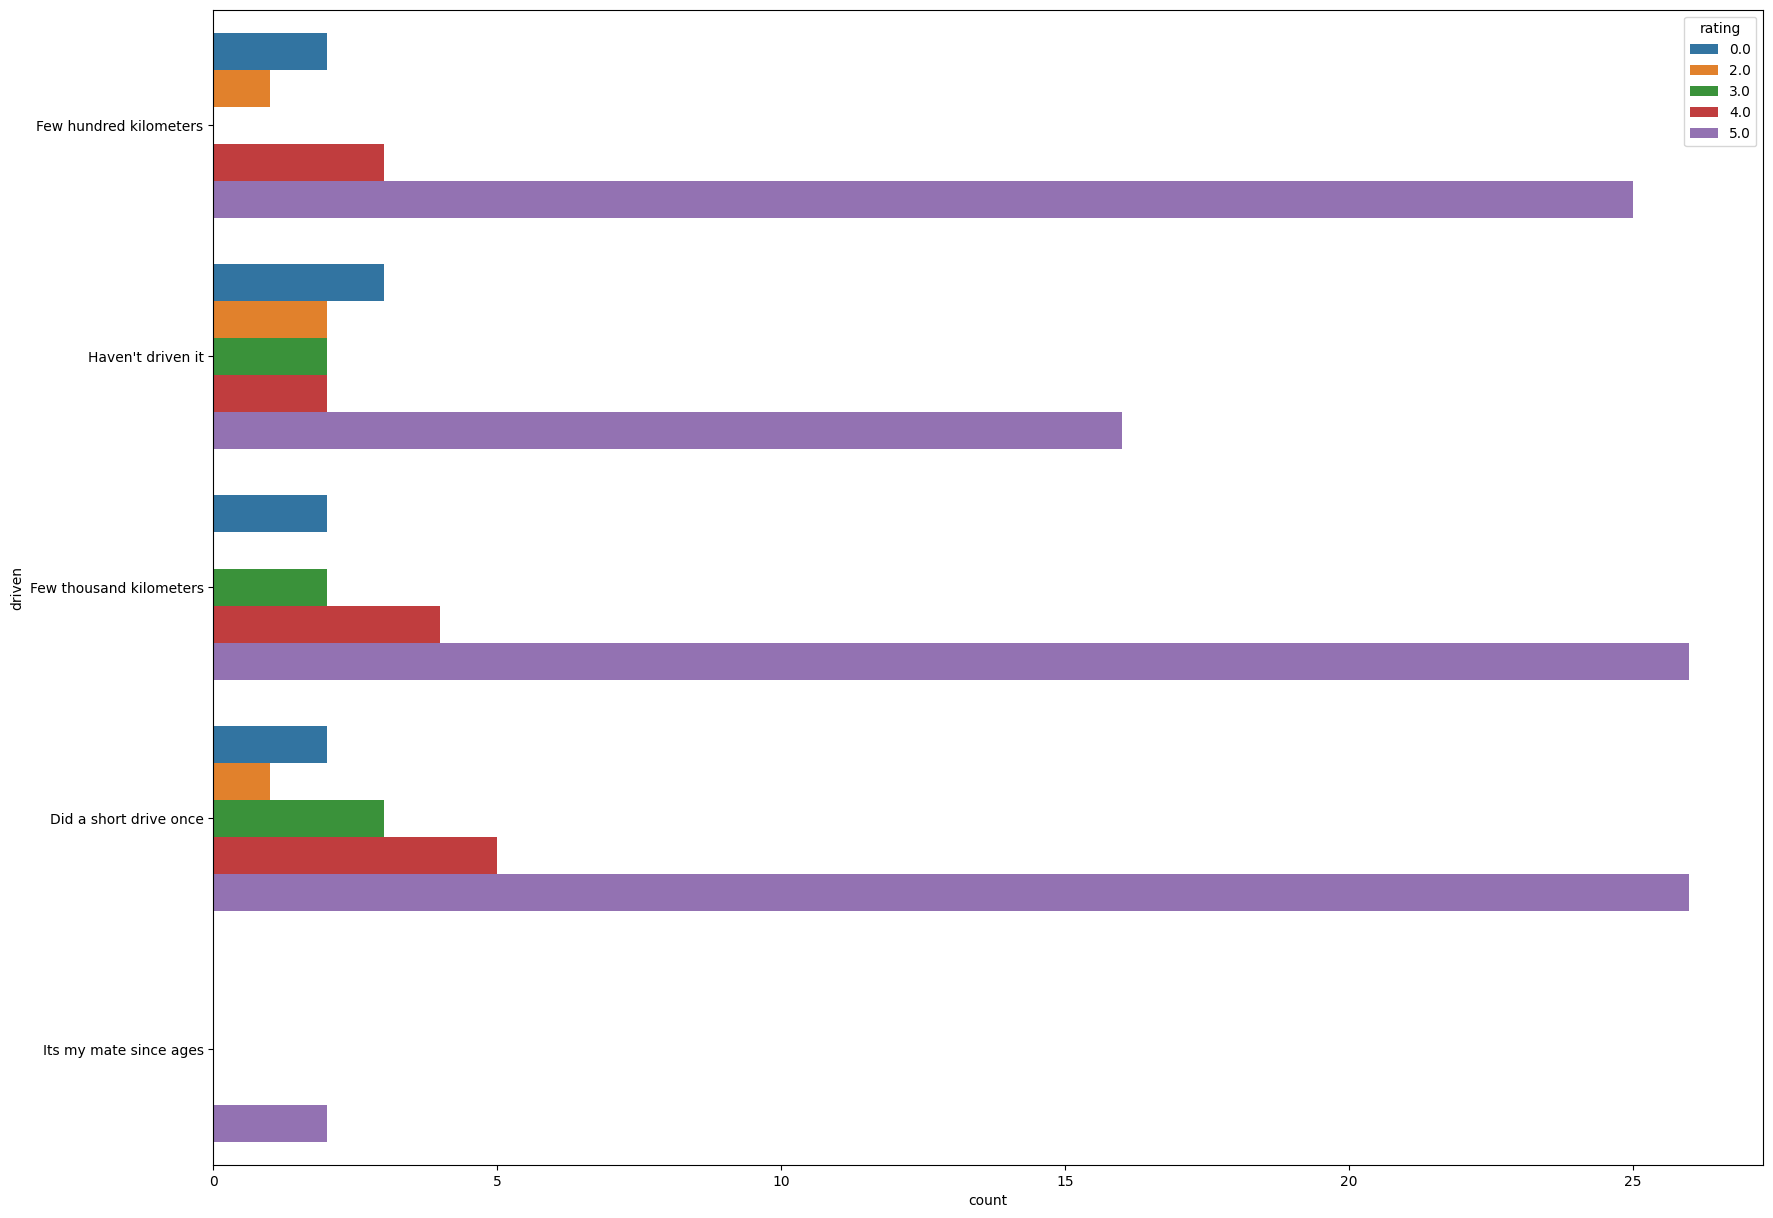

In [7]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='driven', data = df, hue='rating')

<Axes: xlabel='count', ylabel='Condition'>

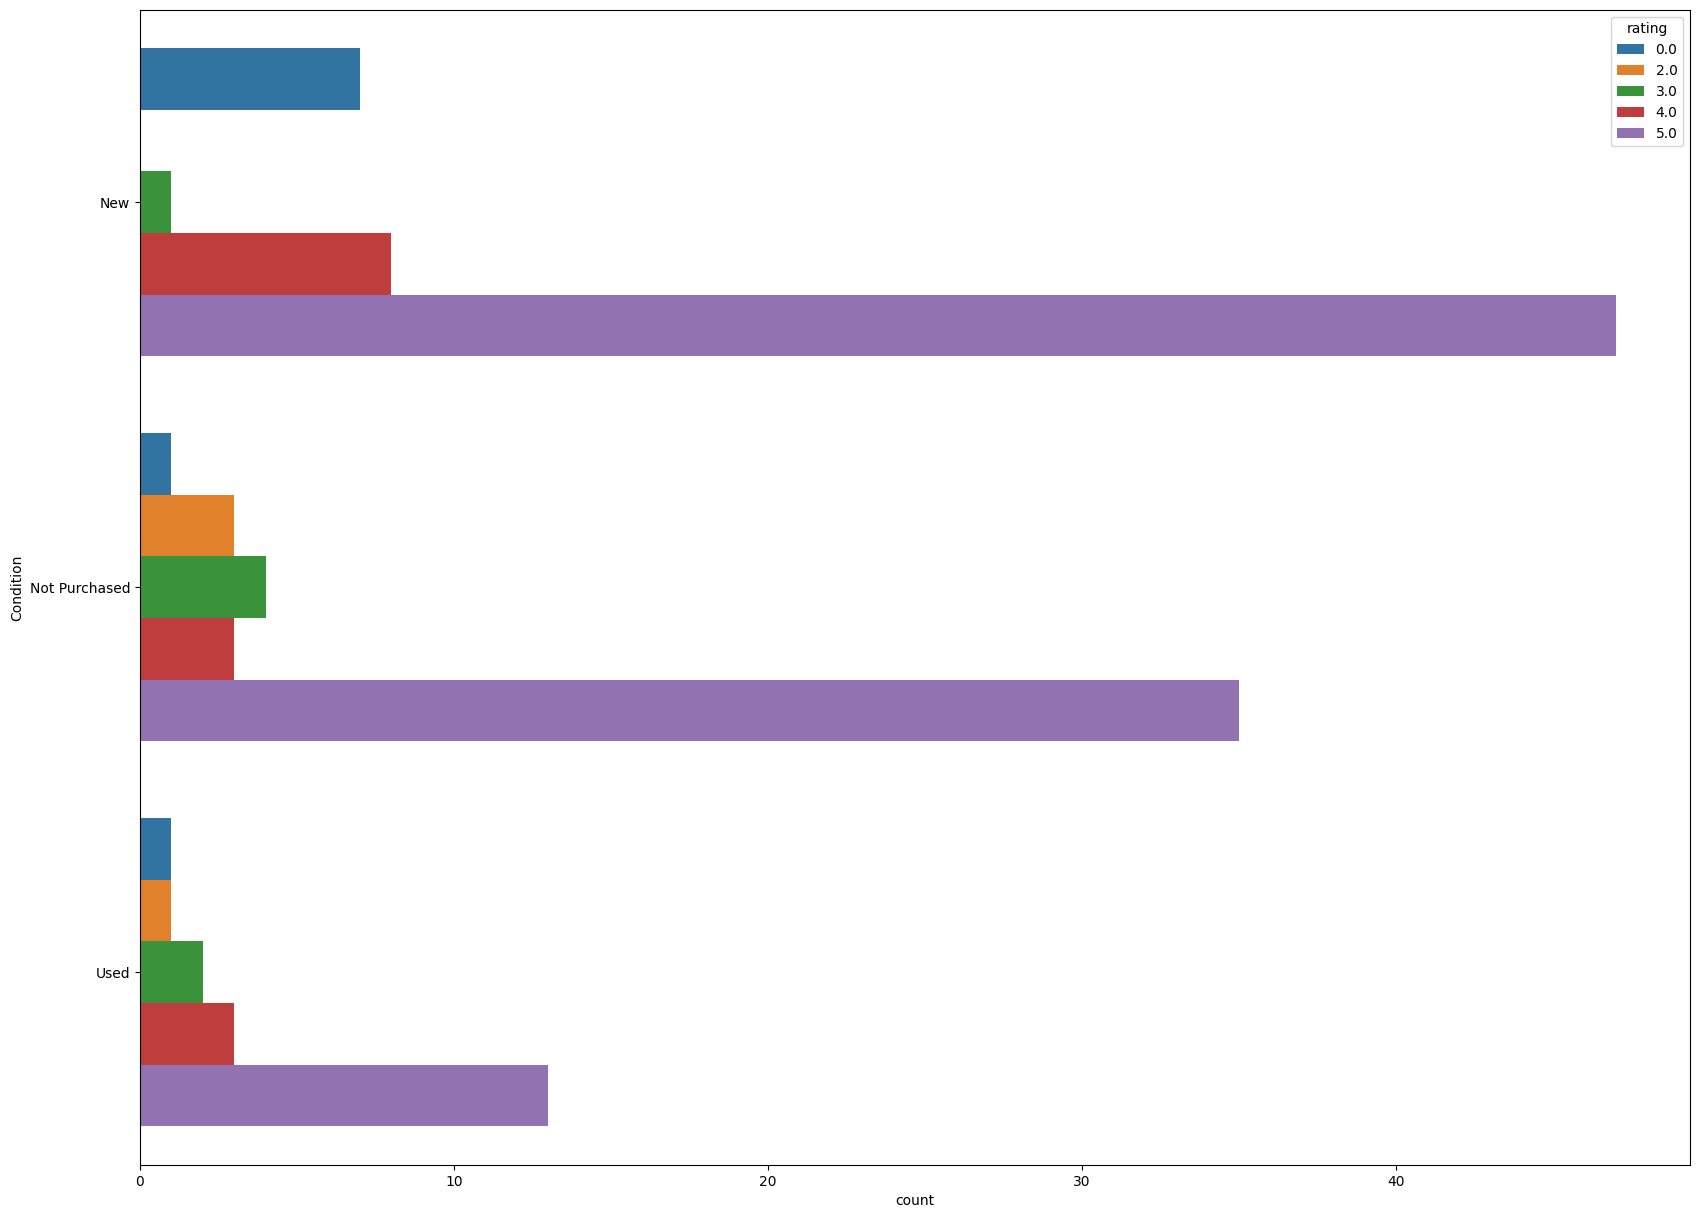

In [8]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Condition', data = df, hue='rating')

## Principal Component Analysis

In [9]:
columns = df.columns[1:6].values
values = df[columns].values

In [10]:
pca = PCA()

pca.fit_transform(values)
std = pca.components_.std(axis=0)
cumsumProportions = pca.explained_variance_ratio_.cumsum()

for idx in range(len(columns)):
    print("column: {} \n Standard Deviation: {} \n Proportion of Variance: {} \n Cumulative Proportion: {} \n\n".
    format(columns[idx], std[idx], pca.explained_variance_ratio_[idx], cumsumProportions[idx]))

column: Exterior 
 Standard Deviation: 0.3468372139515538 
 Proportion of Variance: 0.8389048691516312 
 Cumulative Proportion: 0.8389048691516312 


column: Comfort 
 Standard Deviation: 0.4390214619268104 
 Proportion of Variance: 0.0628786145072468 
 Cumulative Proportion: 0.9017834836588781 


column: Performance 
 Standard Deviation: 0.4004802813592984 
 Proportion of Variance: 0.044994311917413515 
 Cumulative Proportion: 0.9467777955762916 


column: Fuel Economy 
 Standard Deviation: 0.3833898257930931 
 Proportion of Variance: 0.0347551093991175 
 Cumulative Proportion: 0.9815329049754091 


column: Value for Money 
 Standard Deviation: 0.42378283201032285 
 Proportion of Variance: 0.018467095024590978 
 Cumulative Proportion: 1.0 




In [11]:
pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(columns))], index=columns)

,PC1,PC2,PC3,PC4,PC5
Exterior,-0.370159,0.504832,0.269510,0.385271,0.622139
Comfort,-0.413099,0.423520,0.139751,0.193792,-0.769997
Performance,-0.461816,0.133287,0.080588,-0.865190,0.117949
Fuel Economy,-0.437811,-0.063993,-0.880245,0.152519,0.078310
Value for Money,-0.536078,-0.737506,0.355679,0.205413,-0.001794


In [13]:
pca = PCA()
components = pca.fit_transform(values)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, title='Principal components analysis')

for i, feature in enumerate(columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



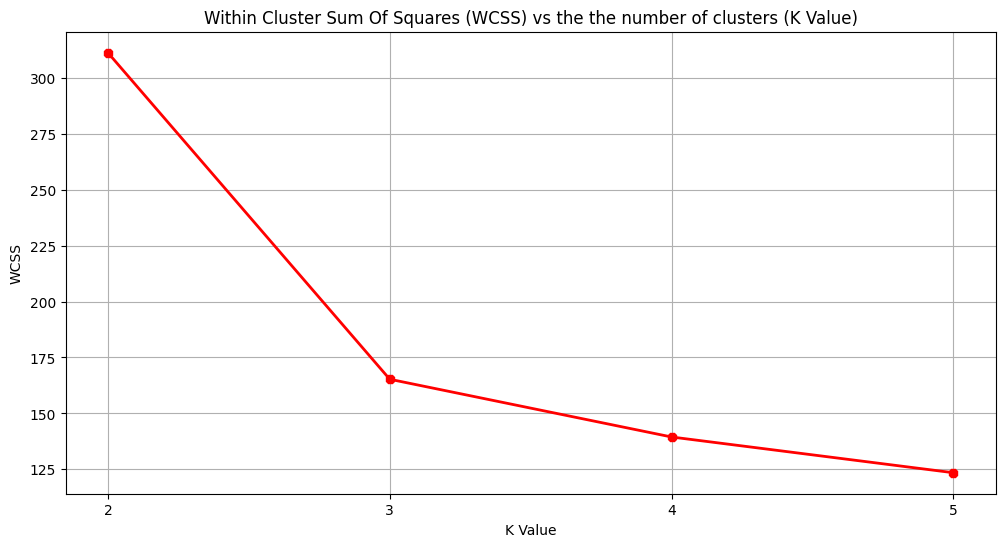

In [14]:
wcss = []
for k in range(2,6):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(2,6),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,6,1))
plt.title('Within Cluster Sum Of Squares (WCSS) vs the the number of clusters (K Value)')
plt.ylabel("WCSS")
plt.show()

The graph presents an elbow at k=3

## Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_score is : 0.7219919432326543


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3 The average silhouette_score is : 0.6315470424676867


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_score is : 0.5541084187437845


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5 The average silhouette_score is : 0.5340780432083935


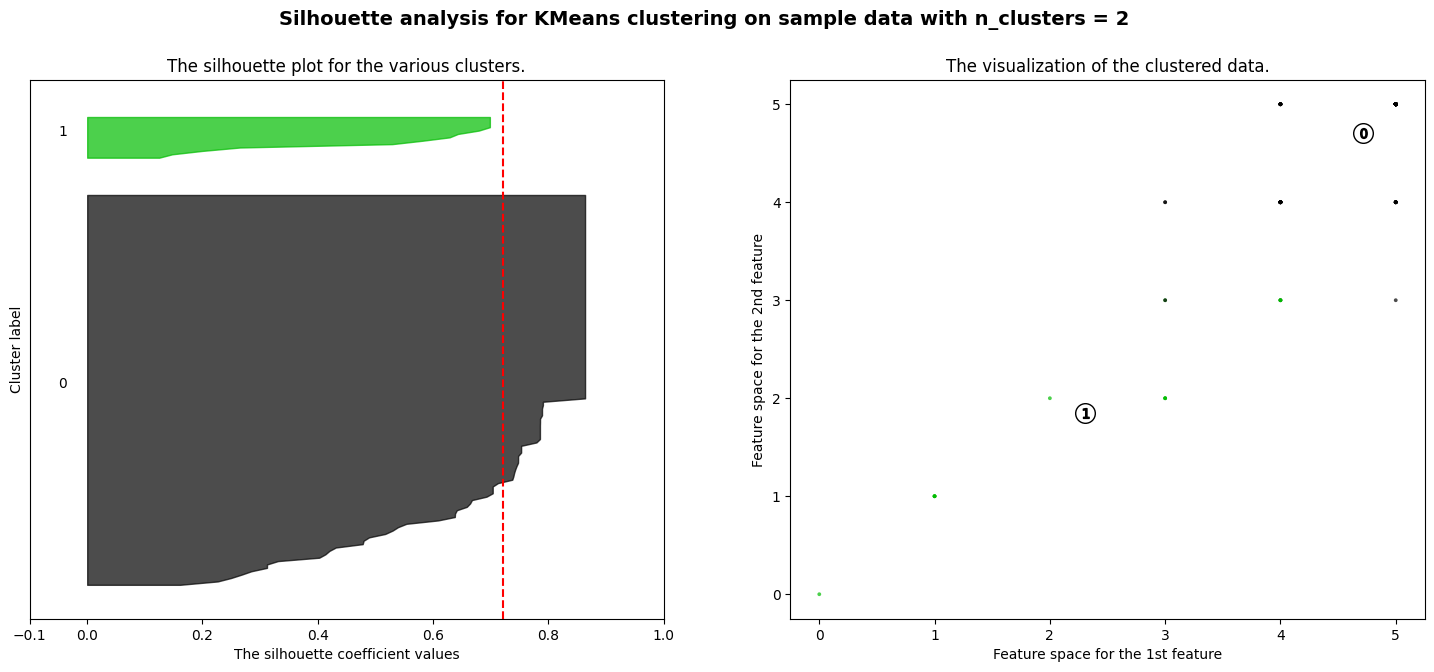

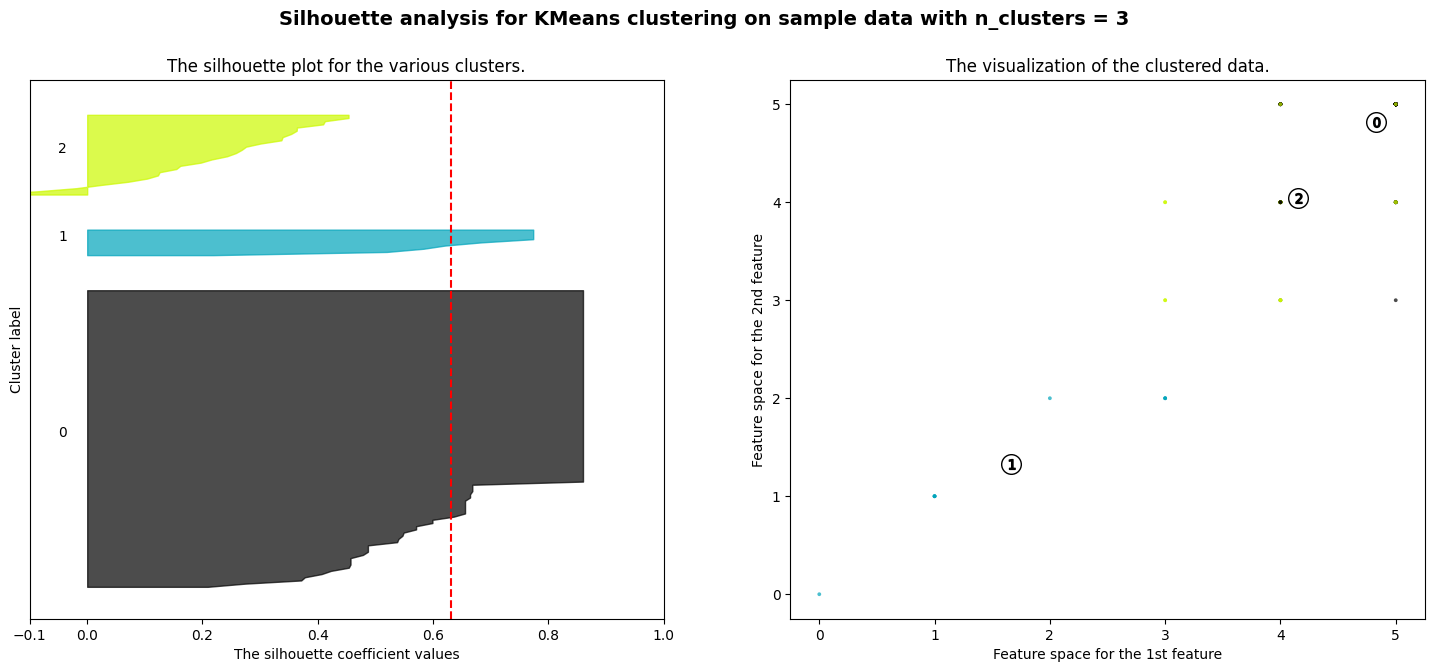

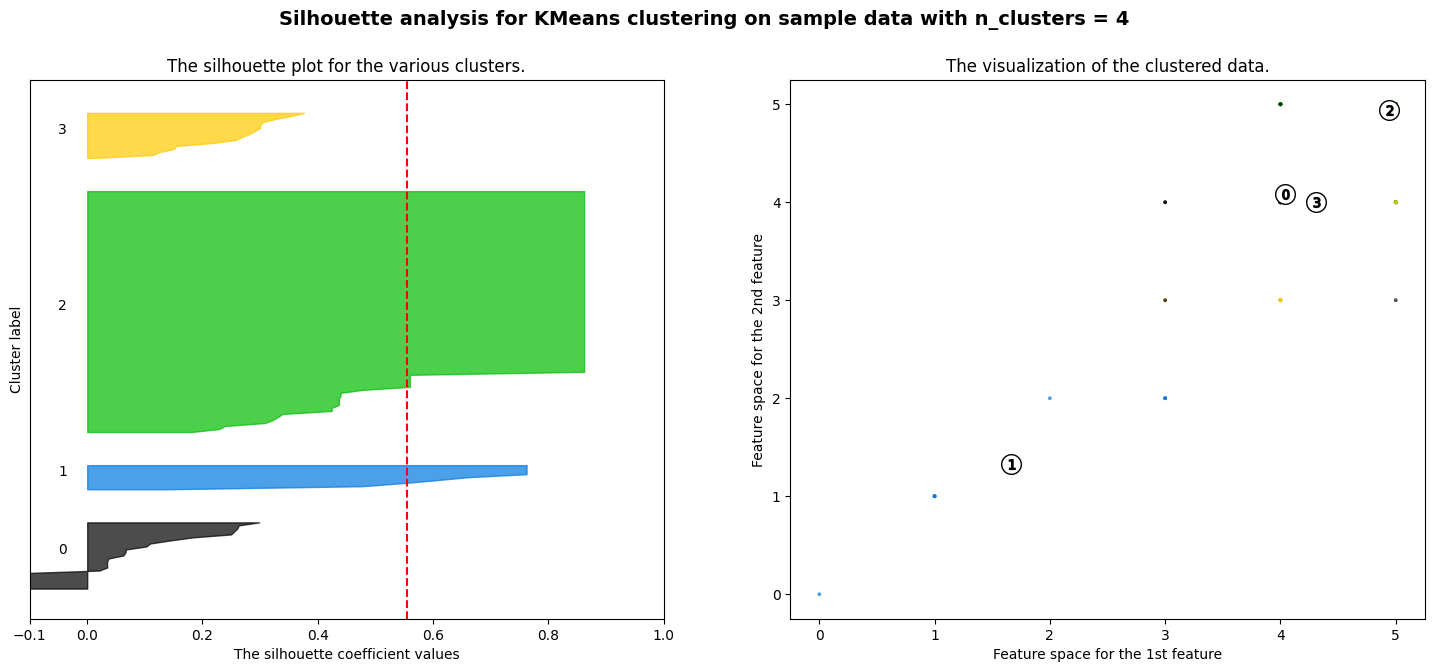

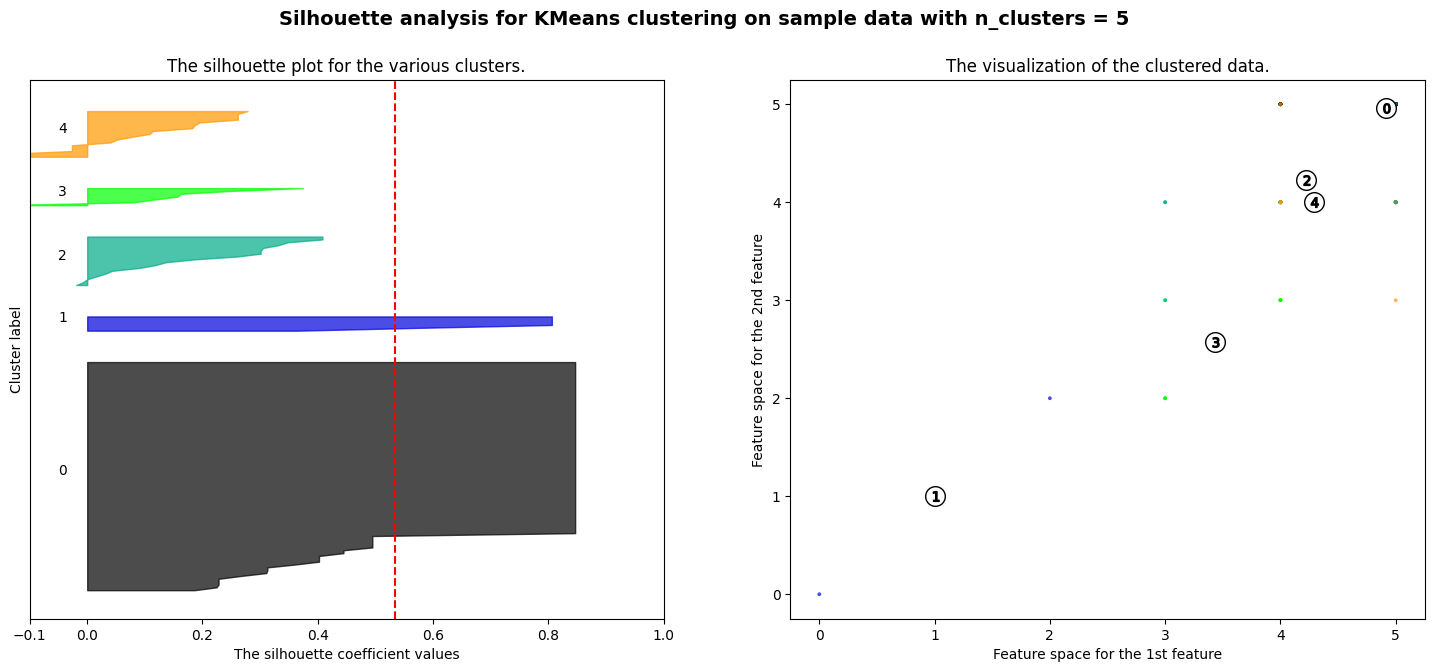

In [15]:
X = values

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = np.arange(2, 6)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Number of clusters given by silhouette plot is 2

In [16]:
rng = np.random.default_rng()

kmeans = KMeans(n_clusters=3)
X = rng.choice(values, 200, axis=0)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

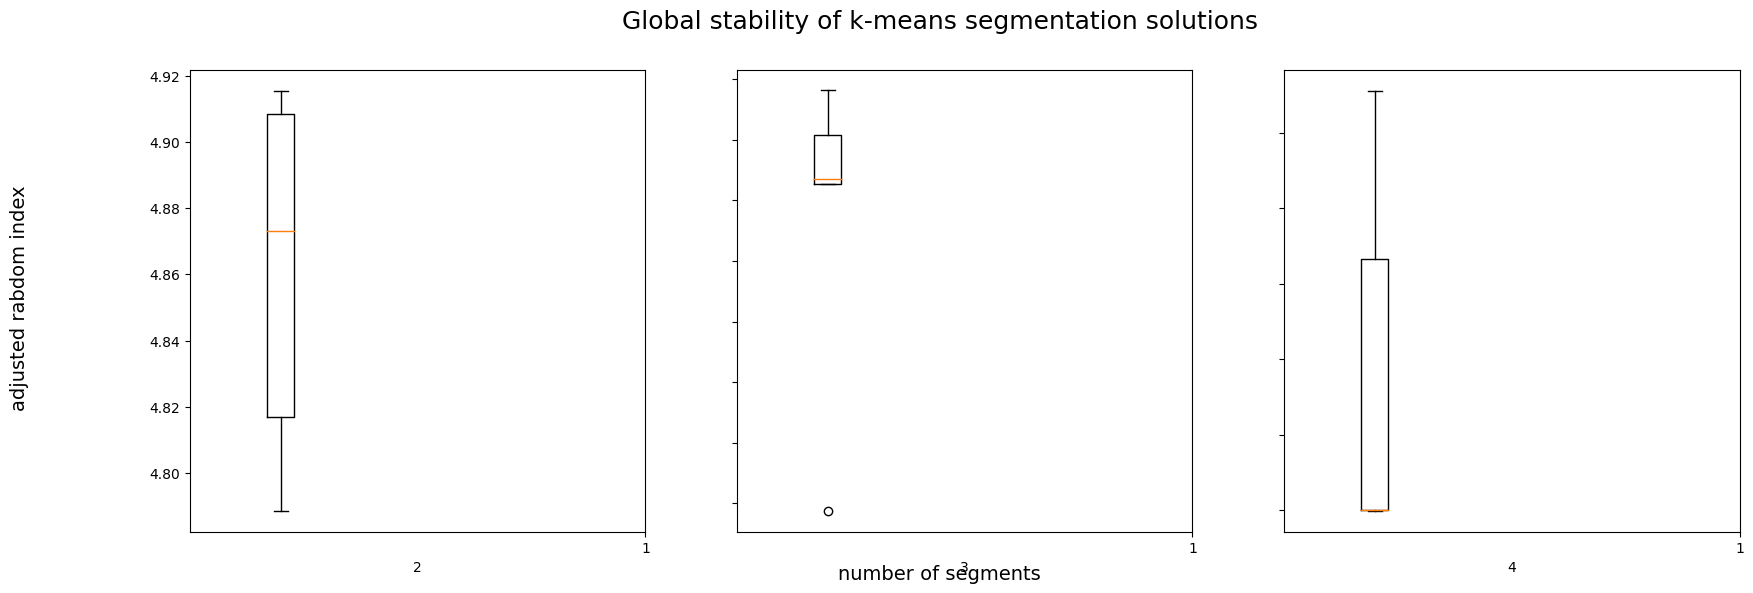

In [17]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,6))

fig.suptitle('Global stability of k-means segmentation solutions', fontsize=18)

i=0


for ax in axes.flatten():
    ax.boxplot(kmeans.cluster_centers_[i])
    i+=1
    ax.label_outer()
    ax.set_xticks([i])
    ax.set_xlabel(i+1)

fig.text(0.5, 0.04, 'number of segments', va='center', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'adjusted rabdom index', va='center', ha='center', rotation='vertical', fontsize=14)

plt.show()

## Using Mixtures of Regression Models

In [18]:
target = df['rating'].values

In [19]:
from sklearn.mixture import GaussianMixture
bic = []
aic = []

for k in range(2, 6):
    model = GaussianMixture(n_components=k, init_params='random')
    data = np.append(values, target.reshape(-1,1), axis=1)
    model.fit(data)
    print("For K : {} \t convergence after: {} iterations \n \n".format(k, model.n_iter_))

    bic.append(model.bic(data))
    aic.append(model.aic(data))

For K : 2 	 convergence after: 10 iterations 
 

For K : 3 	 convergence after: 12 iterations 
 

For K : 4 	 convergence after: 11 iterations 
 

For K : 5 	 convergence after: 10 iterations 
 



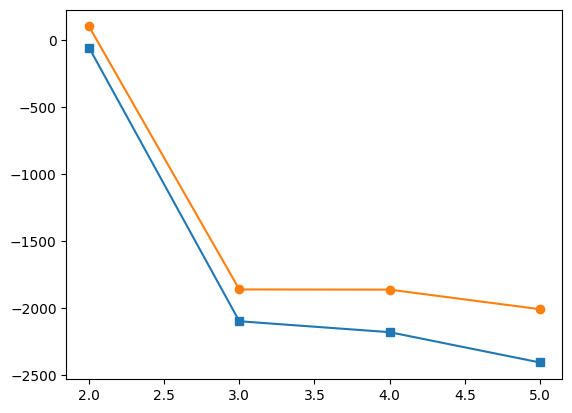

In [20]:
plt.plot(np.arange(2, 6), aic, marker = 's')
plt.plot(np.arange(2, 6), bic, marker = 'o')

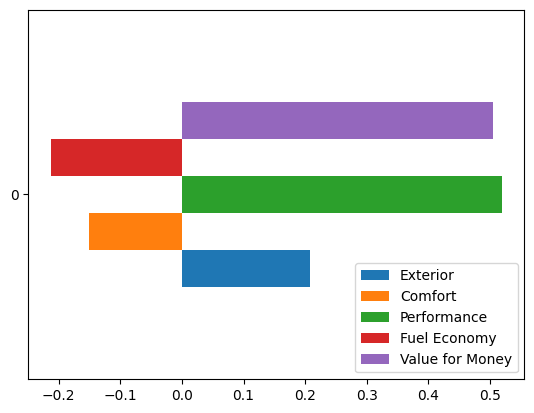

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(values, target)

pd.DataFrame(lr.coef_.reshape(1,-1), columns=columns).plot(y=columns, kind='barh')
plt.show()

##Profiling Segments

INFERENCE: A horizontal line passing through longest distance without a horizontal line gives 2 clusters as shown below:

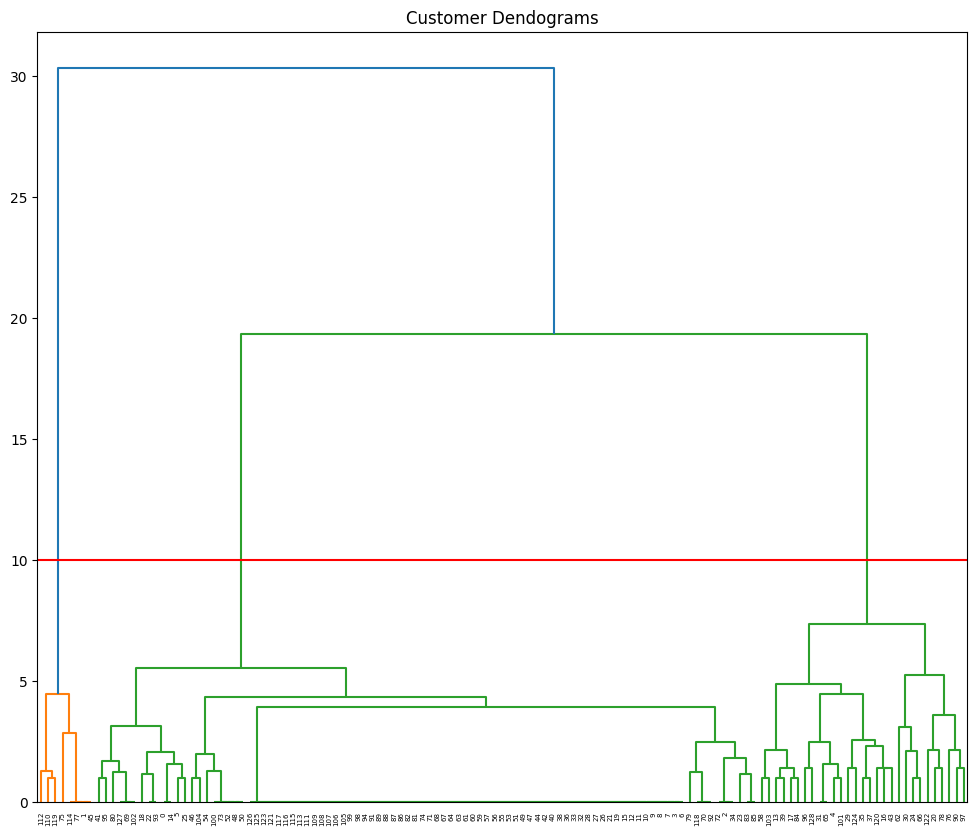

In [22]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.show()

Number of clusters = 3

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0])

## Describing Segments

In [25]:
from statsmodels.graphics.mosaicplot import mosaic
kmeans = KMeans(3, random_state=0).fit(values)
crosstabLike = pd.crosstab(kmeans.labels_, target)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



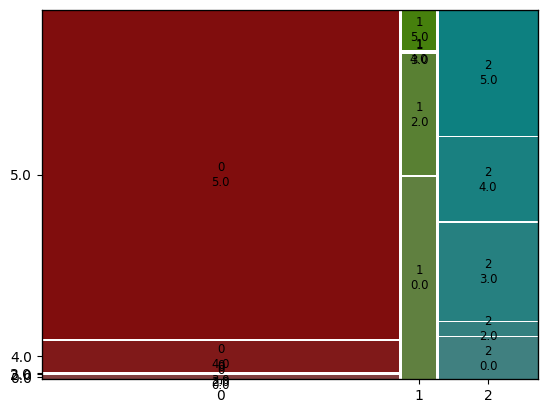

In [43]:
mosaic(crosstabLike.stack())
plt.show()

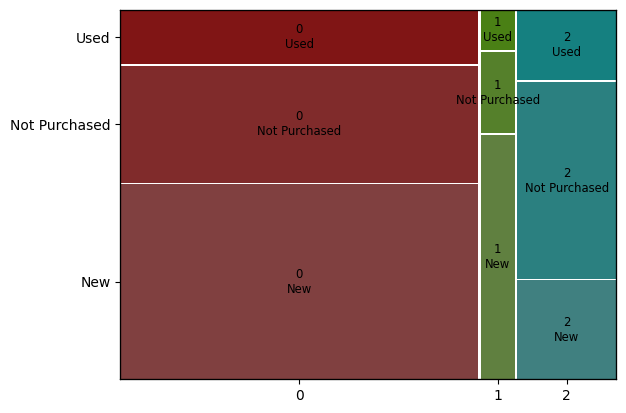

In [27]:
# Condition
crosstabCondition = pd.crosstab(kmeans.labels_, df['Condition'])
mosaic(crosstabCondition.stack())
plt.show()

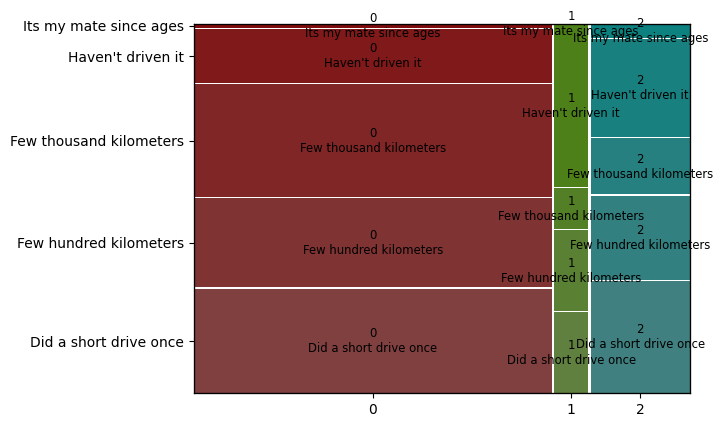

In [28]:
# Distance Driven
crosstabDriven = pd.crosstab(kmeans.labels_, df['driven'])
mosaic(crosstabDriven.stack())
plt.show()

## Selecting the Target Segments

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
dtree = DecisionTreeClassifier()
model = dtree.fit(values, target)


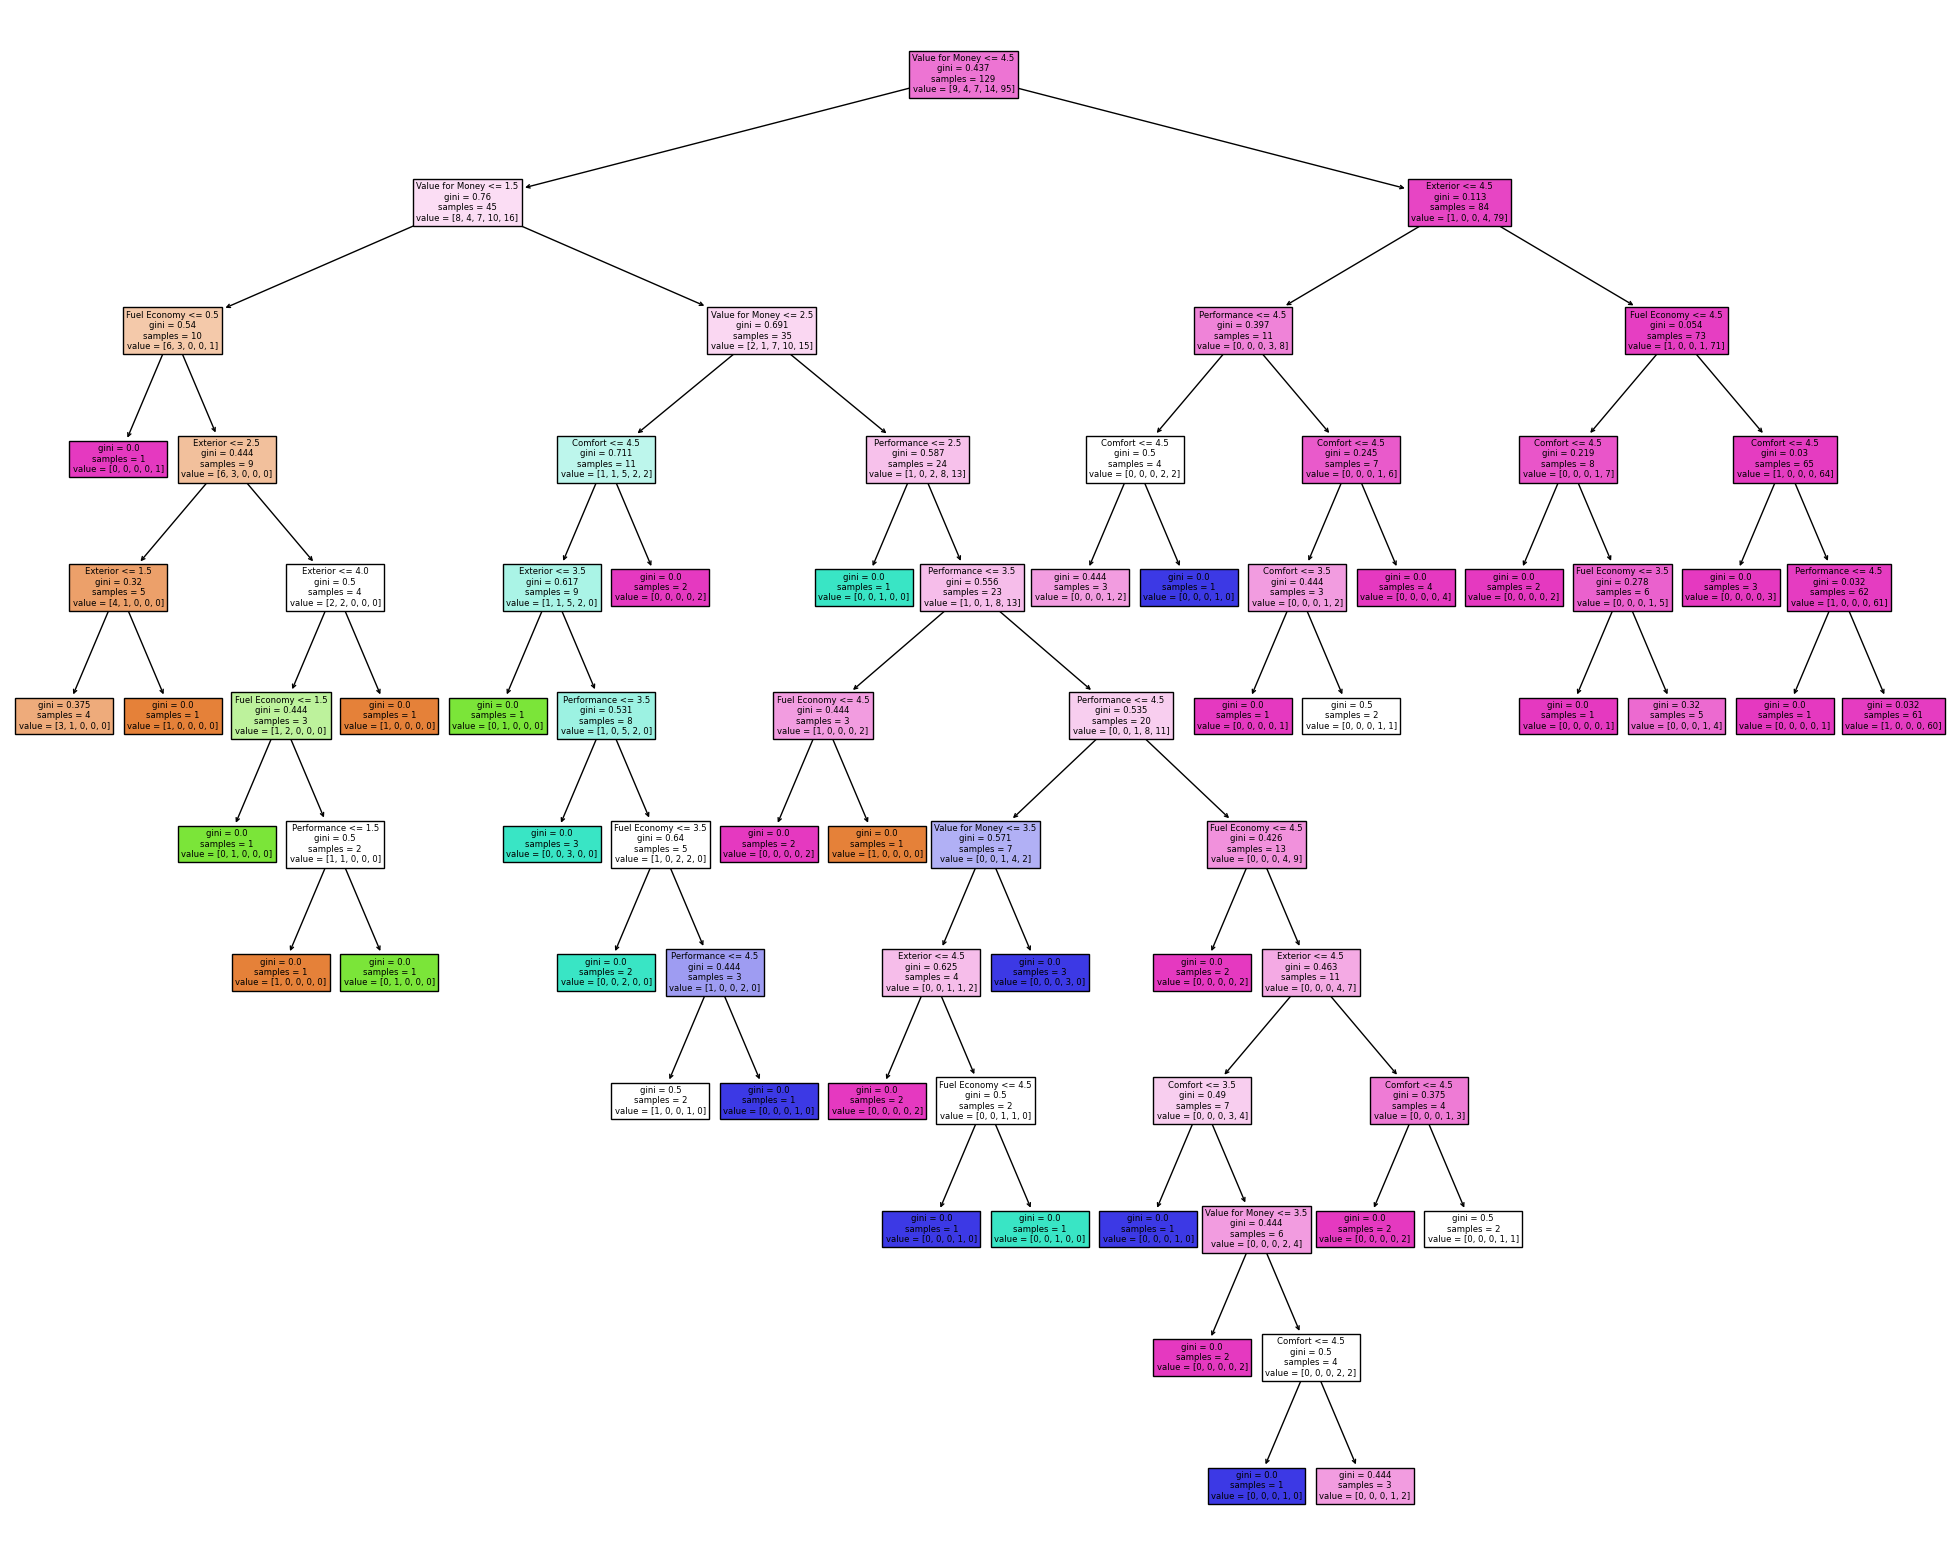

In [30]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,
                   feature_names=columns.tolist(),
                   filled=True)

## Interpret the Clusters

In [36]:
columns = df.columns[1:-3]

In [37]:
df.columns

Index(['review', 'Exterior', 'Comfort', 'Performance', 'Fuel Economy',
       'Value for Money', 'Condition', 'driven', 'rating', 'model_name',
       'KmeansLabels'],
      dtype='object')

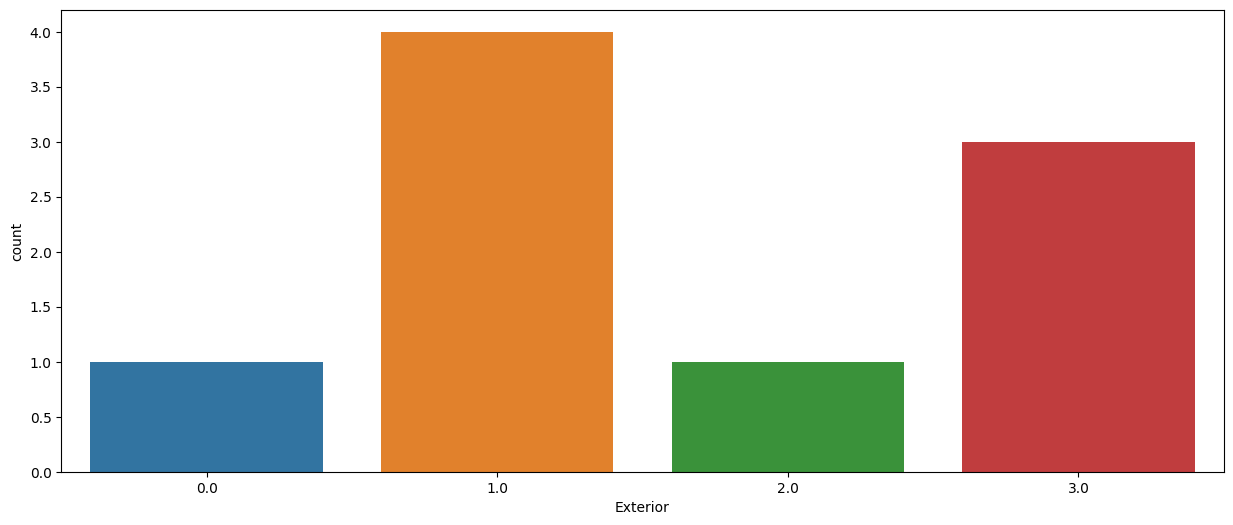

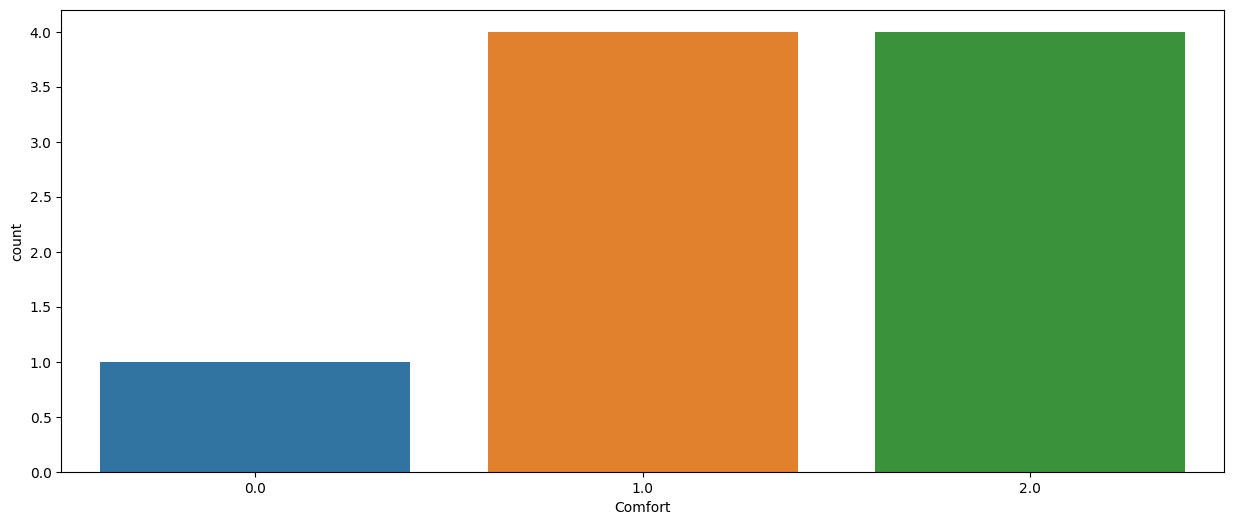

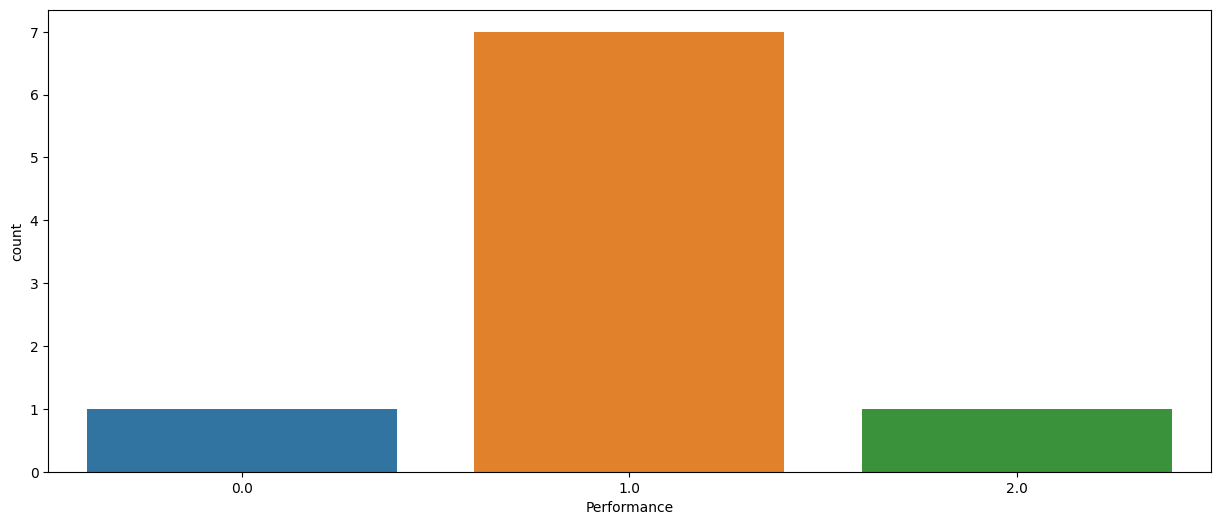

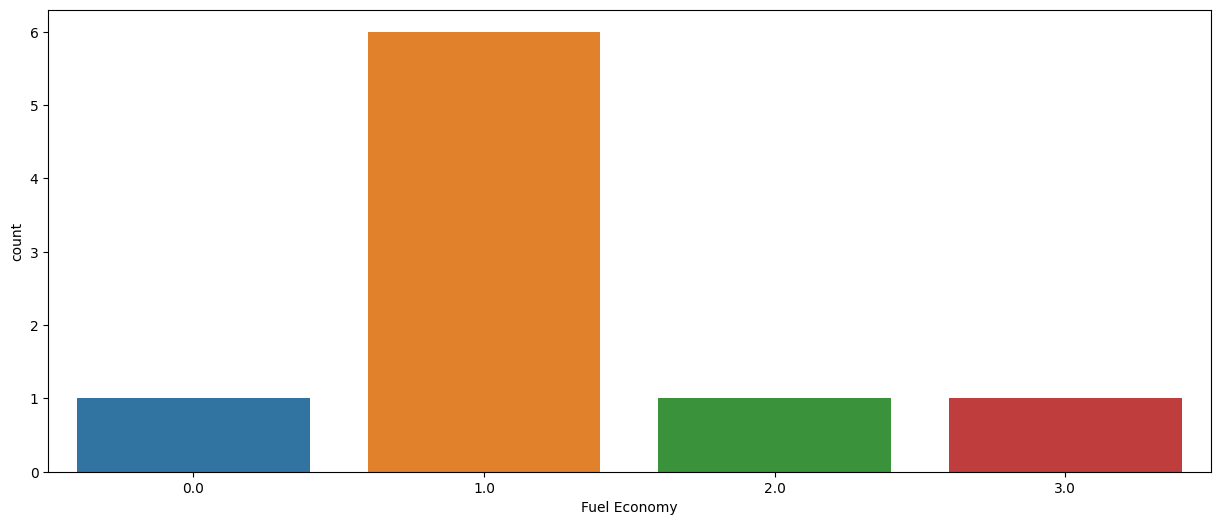

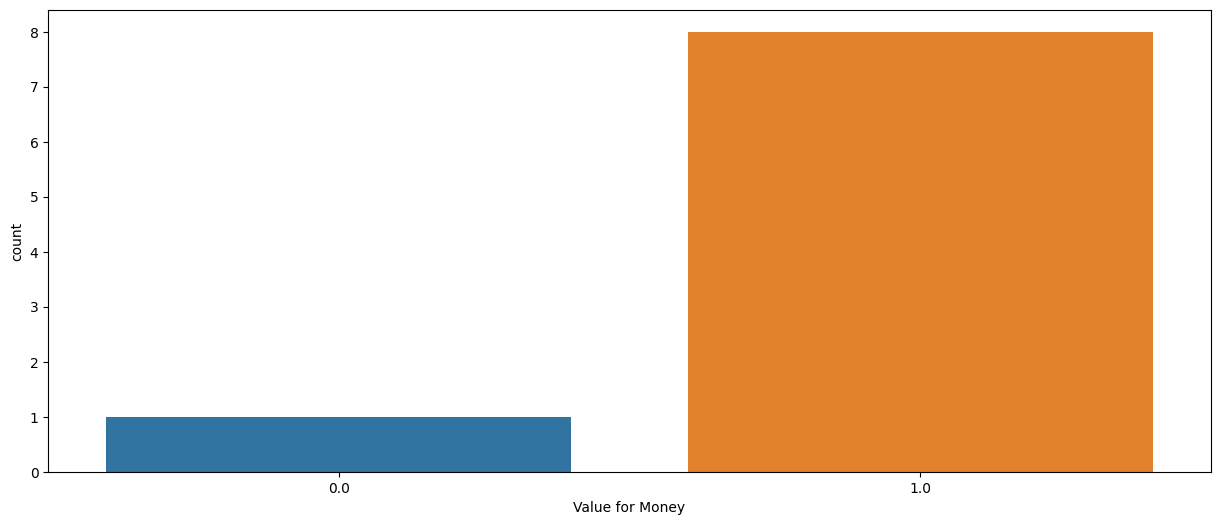

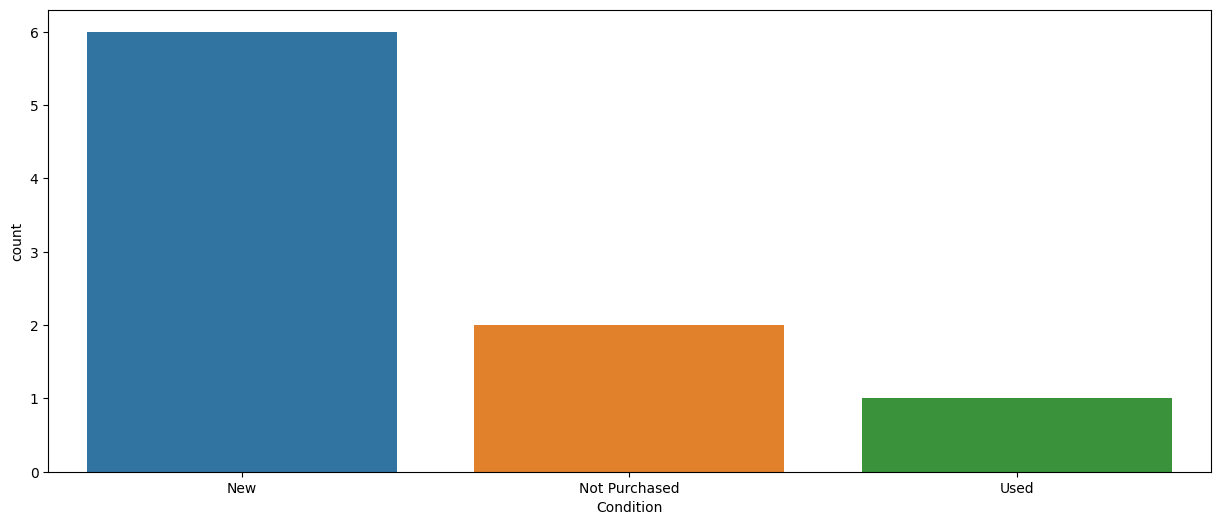

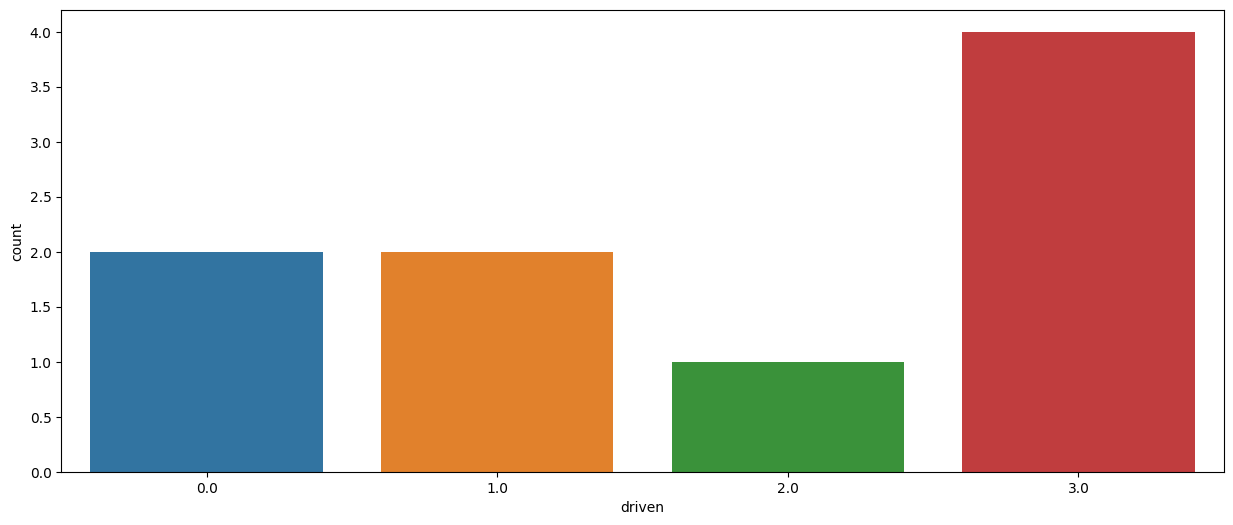

In [38]:
for col in columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=df[df['KmeansLabels'] == 1], x=col)
    plt.show(block=False)

1st Cluster: <br>
- Customers with postive reviews for all the properties <br>
- Most of them own new EVs and haven't driven them much.

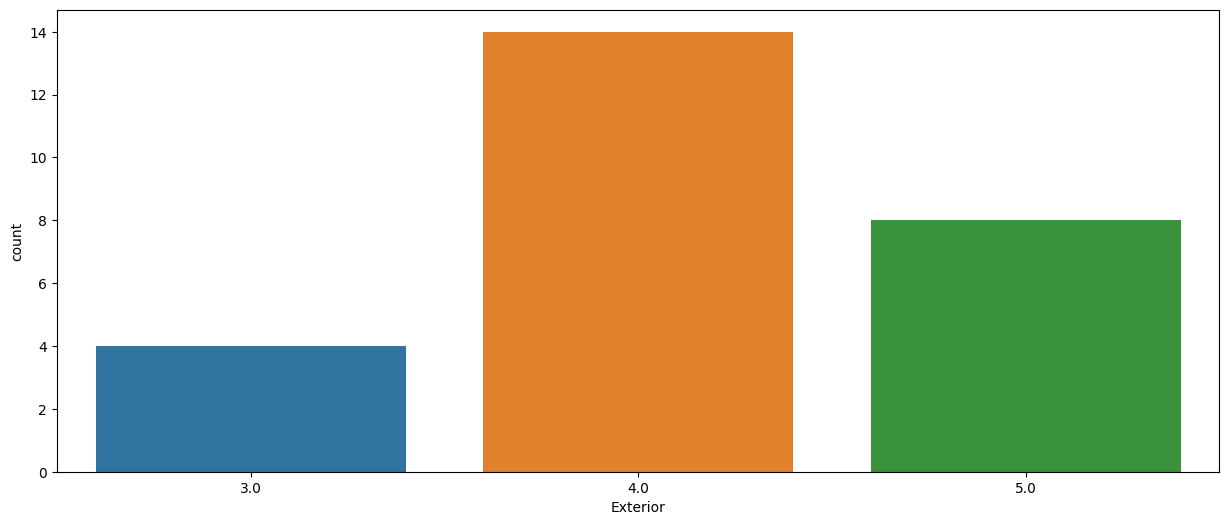

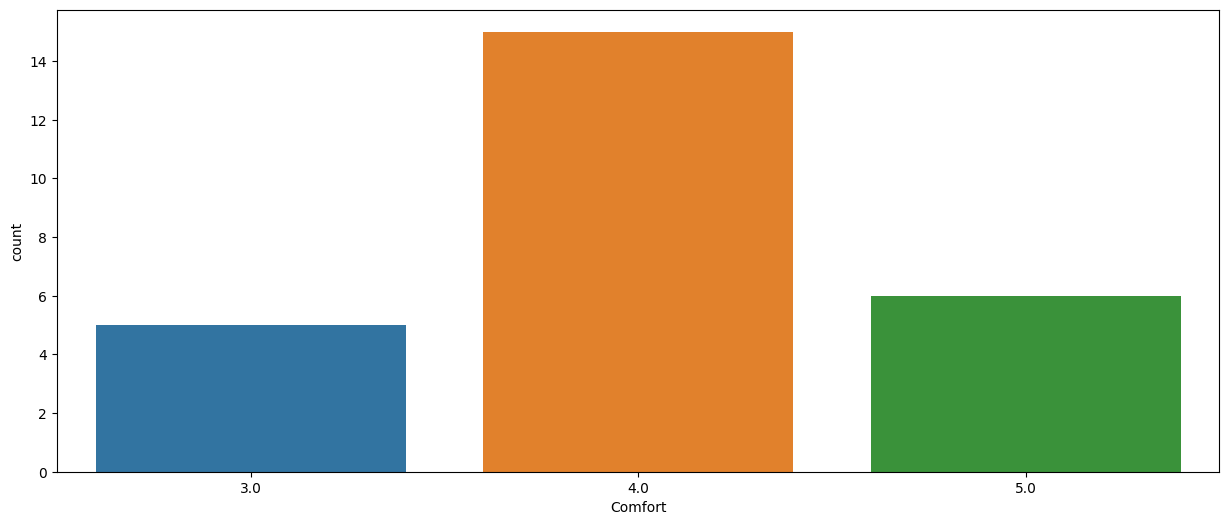

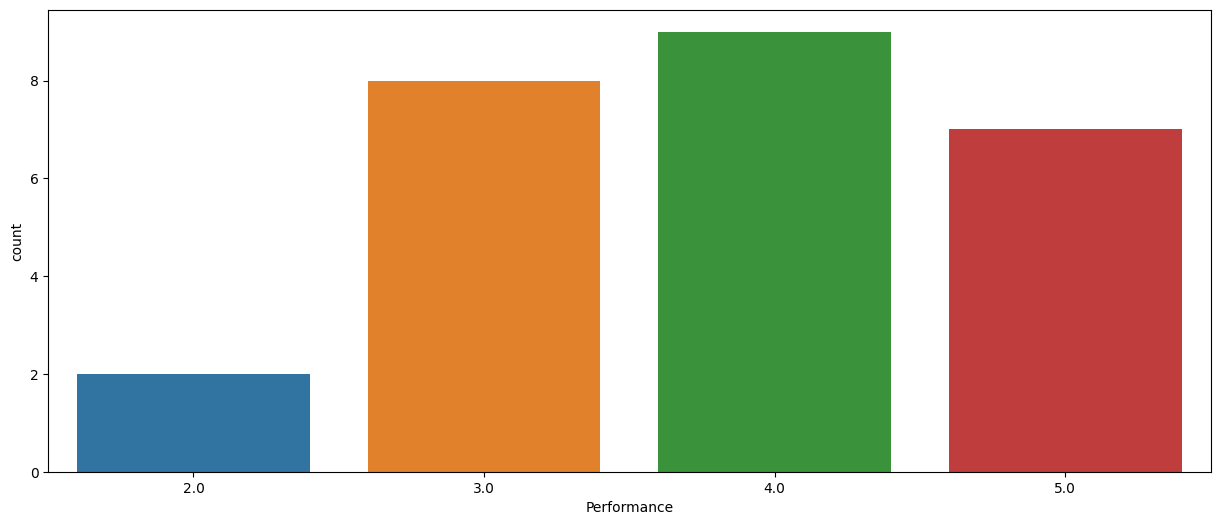

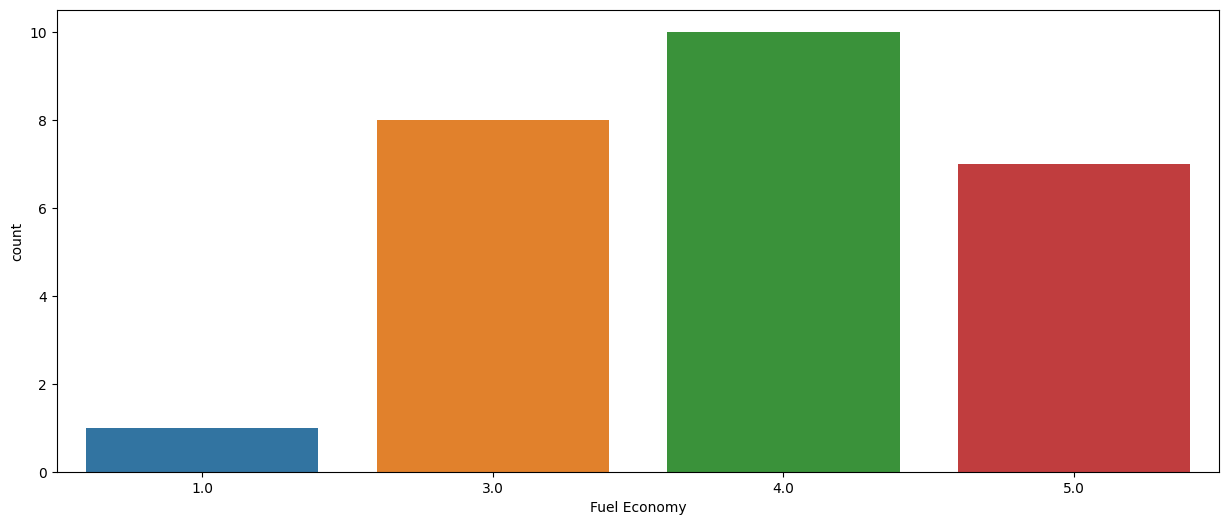

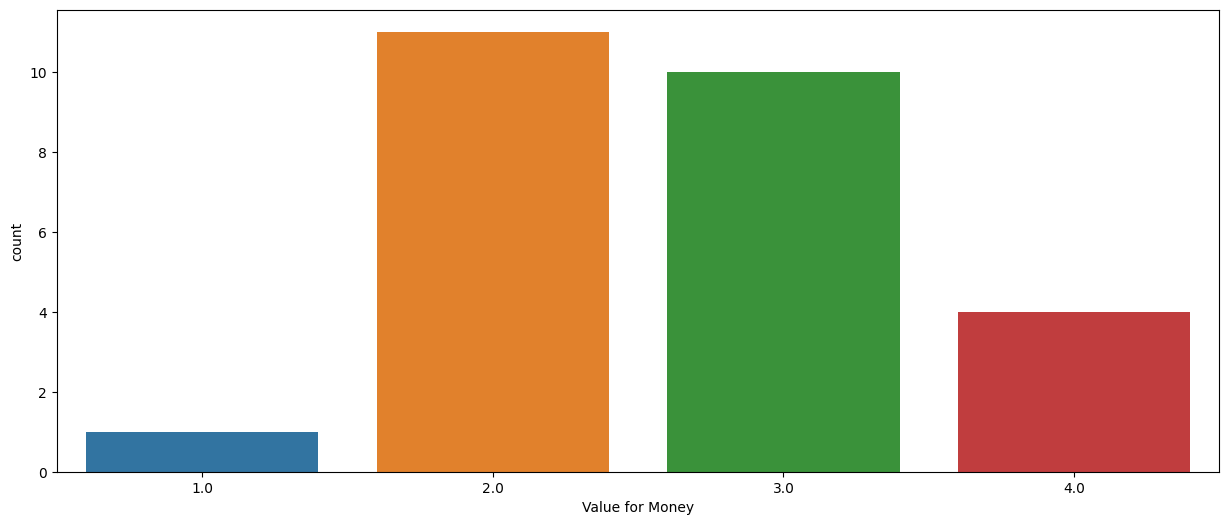

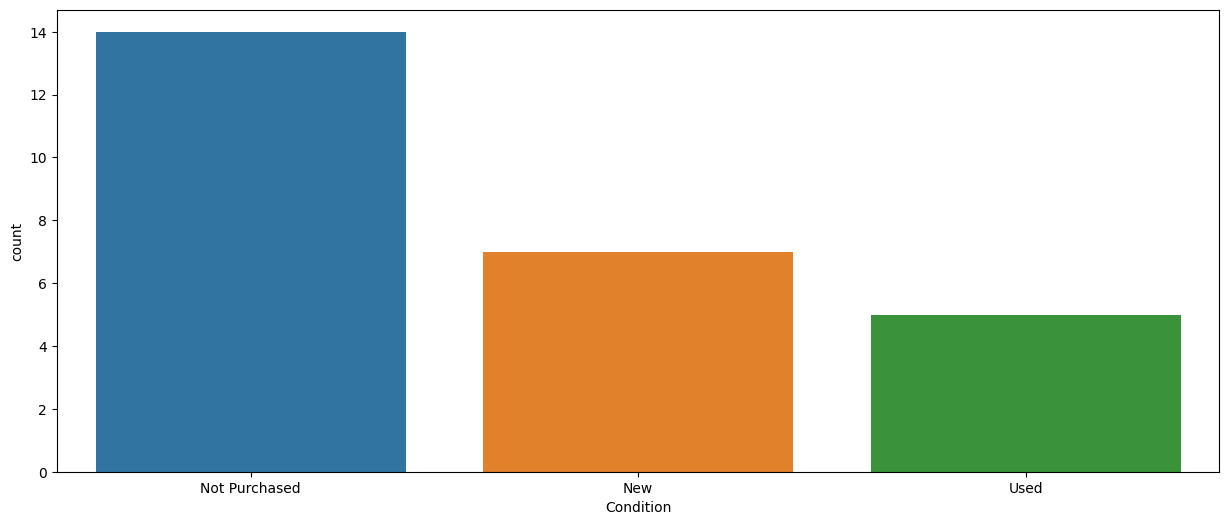

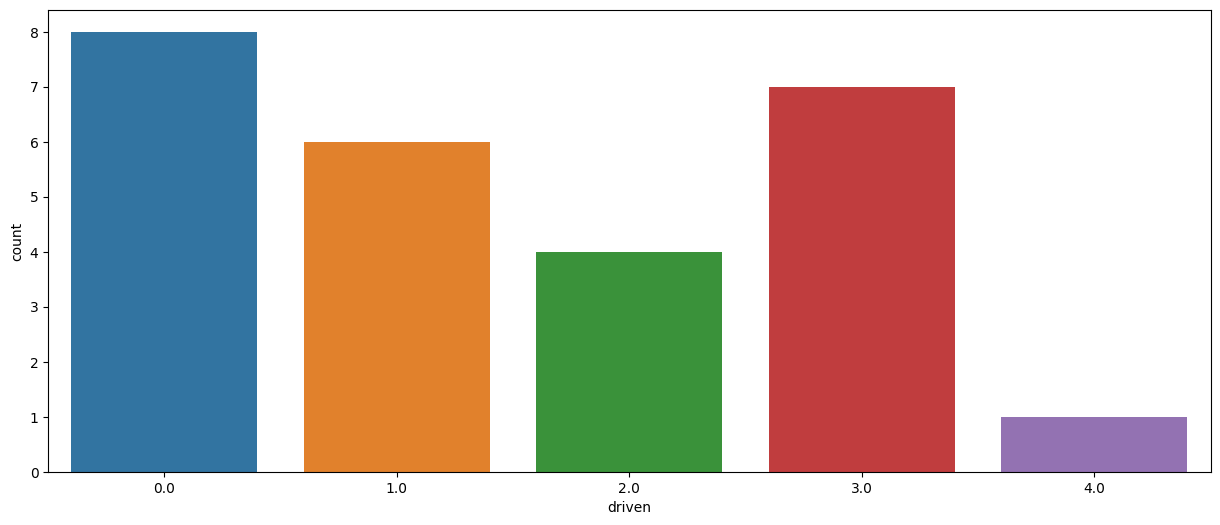

In [39]:
for col in columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=df[df['KmeansLabels'] == 2], x=col)
    plt.show(block=False)

2nd Cluster:  <br>
- Customers with negative reviews for all the properties. <br>
- Customers who purchased new EVs but haven't driven them much.

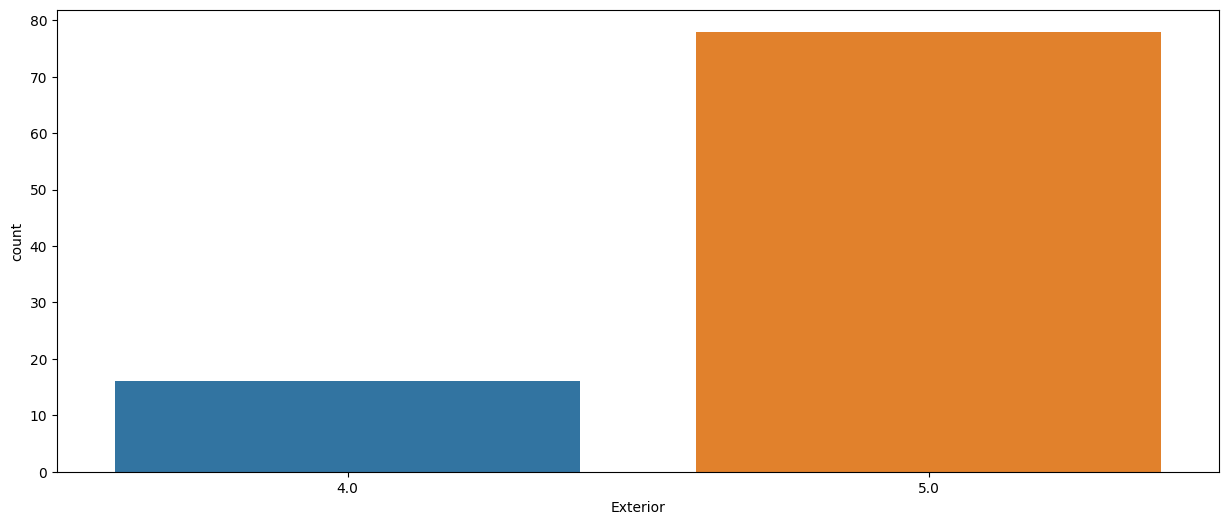

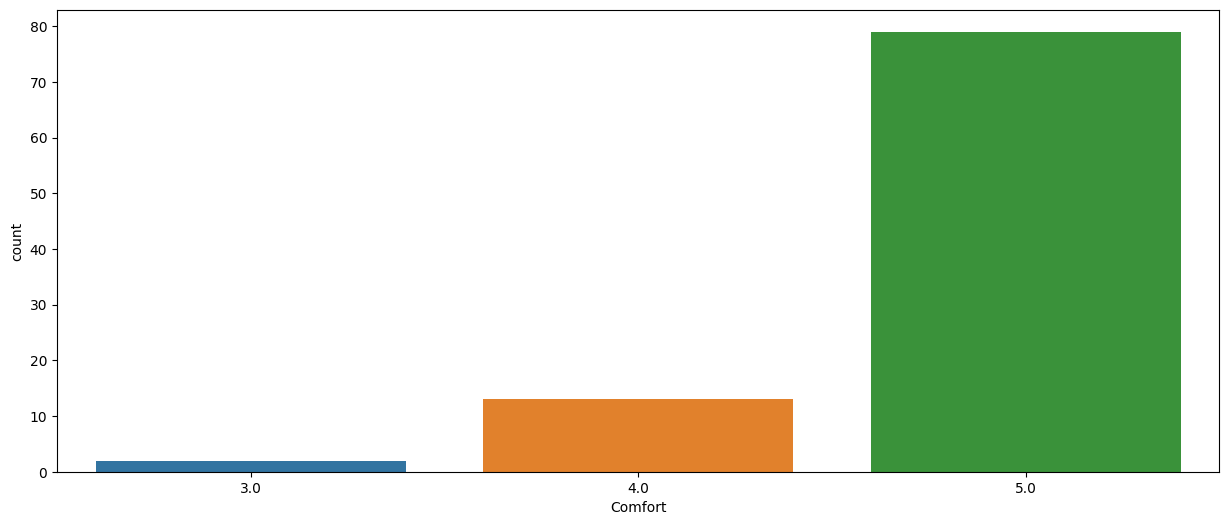

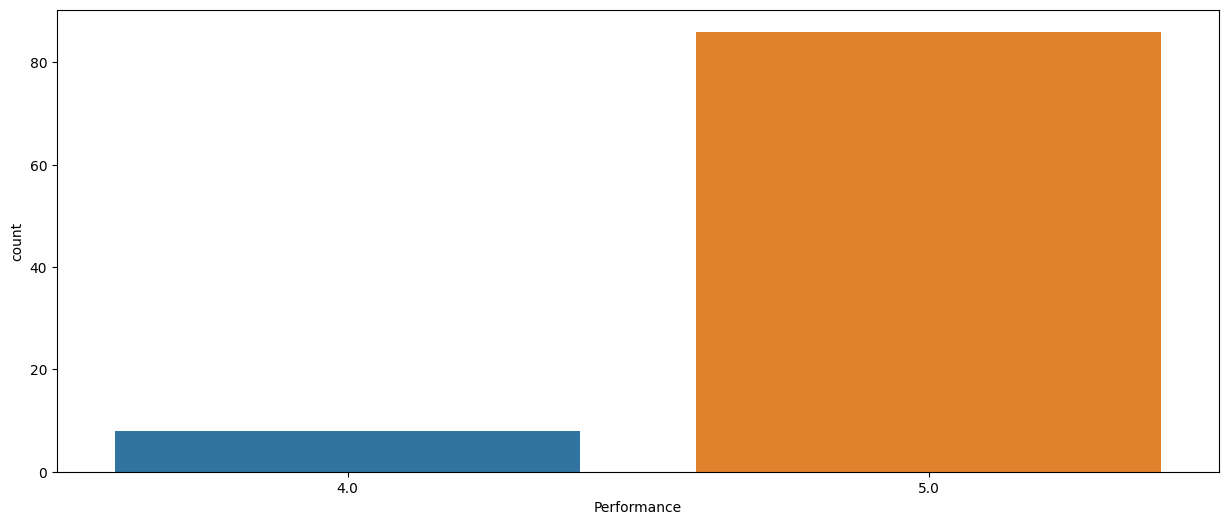

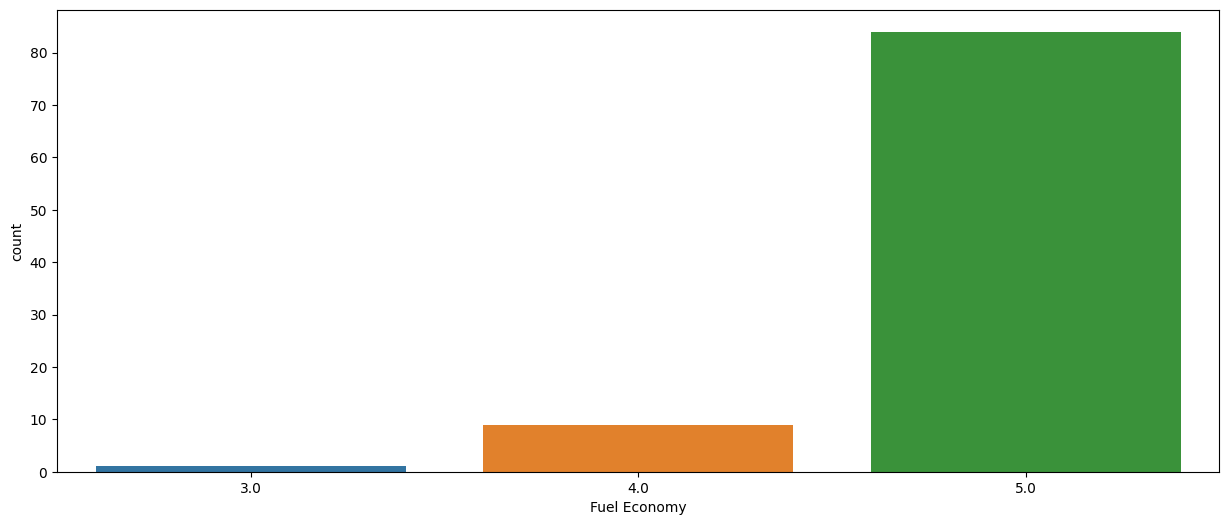

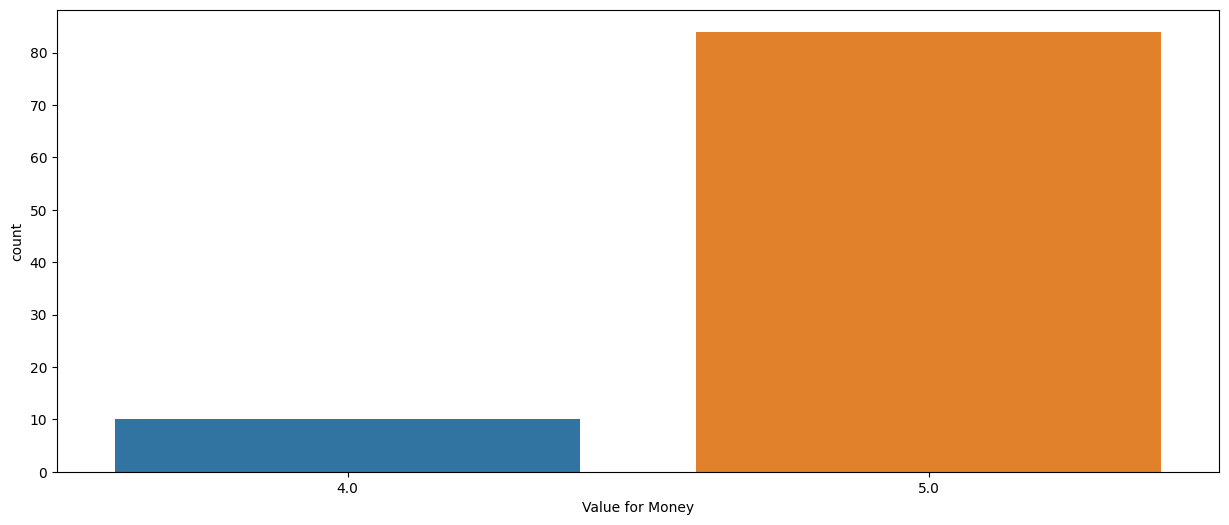

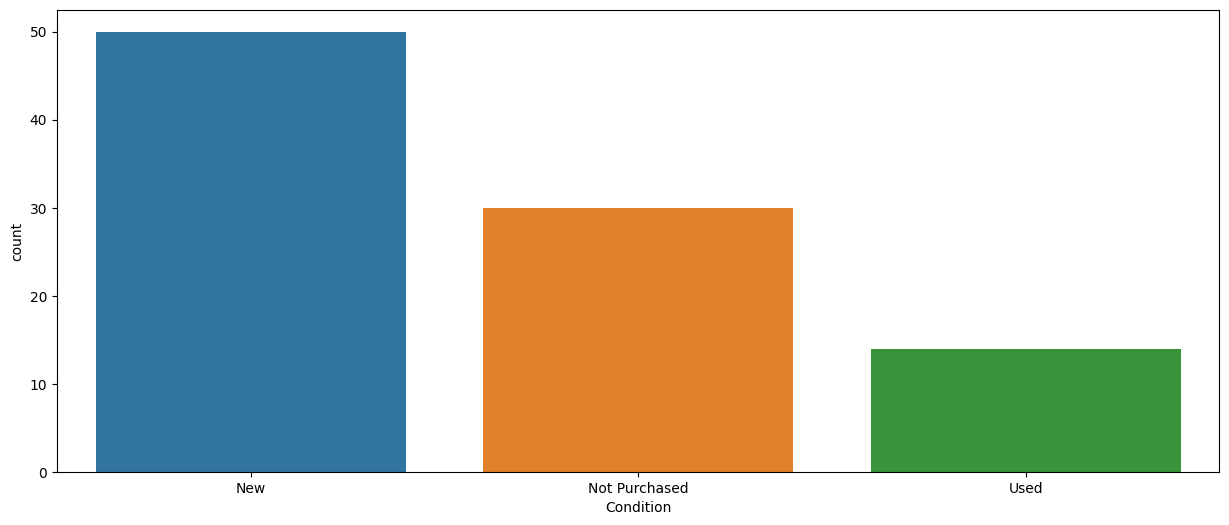

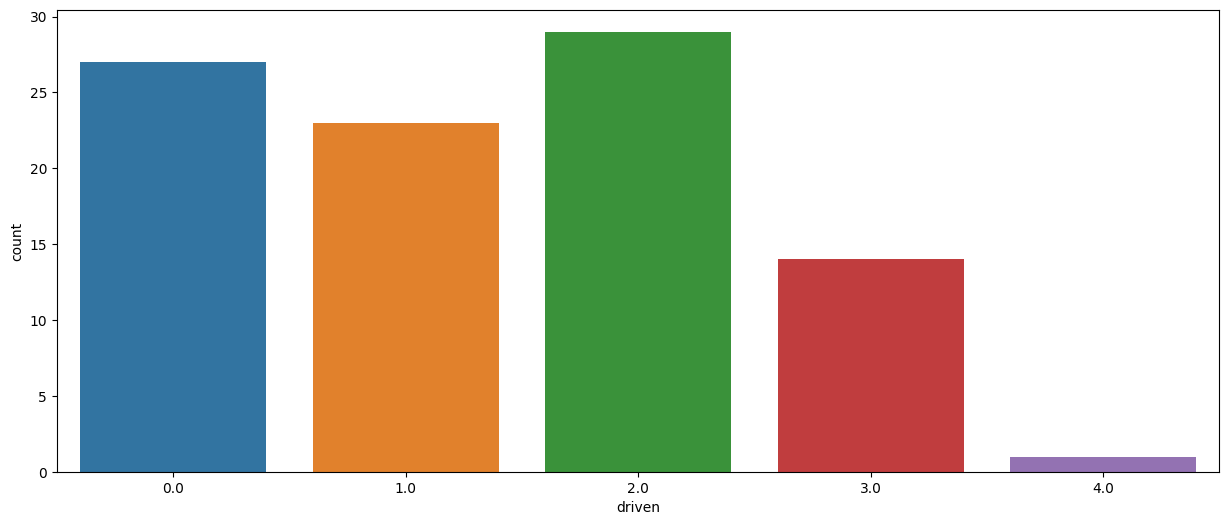

In [40]:
for col in columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=df[df['KmeansLabels'] == 0], x=col)
    plt.show(block=False)

3rd Cluster:<br>
- Customers who are satisfied with the Exterior and the Comfort but have mixed reviews for the remaining properties
-Most of them haven't purchased an EV.



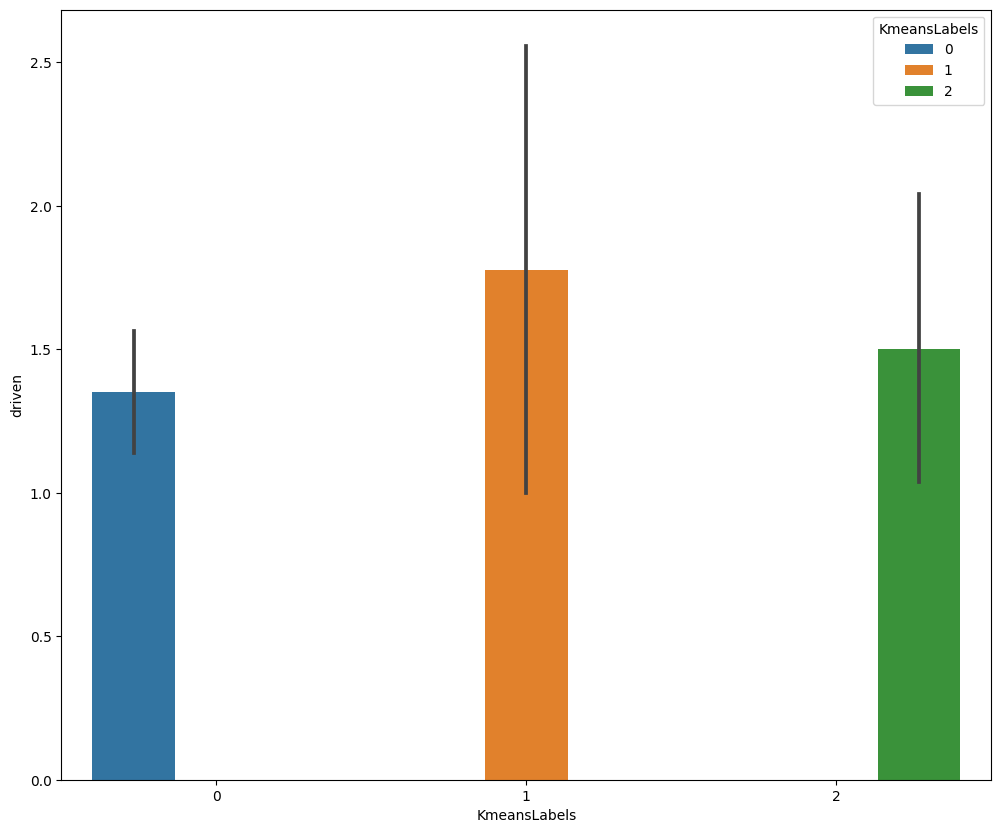

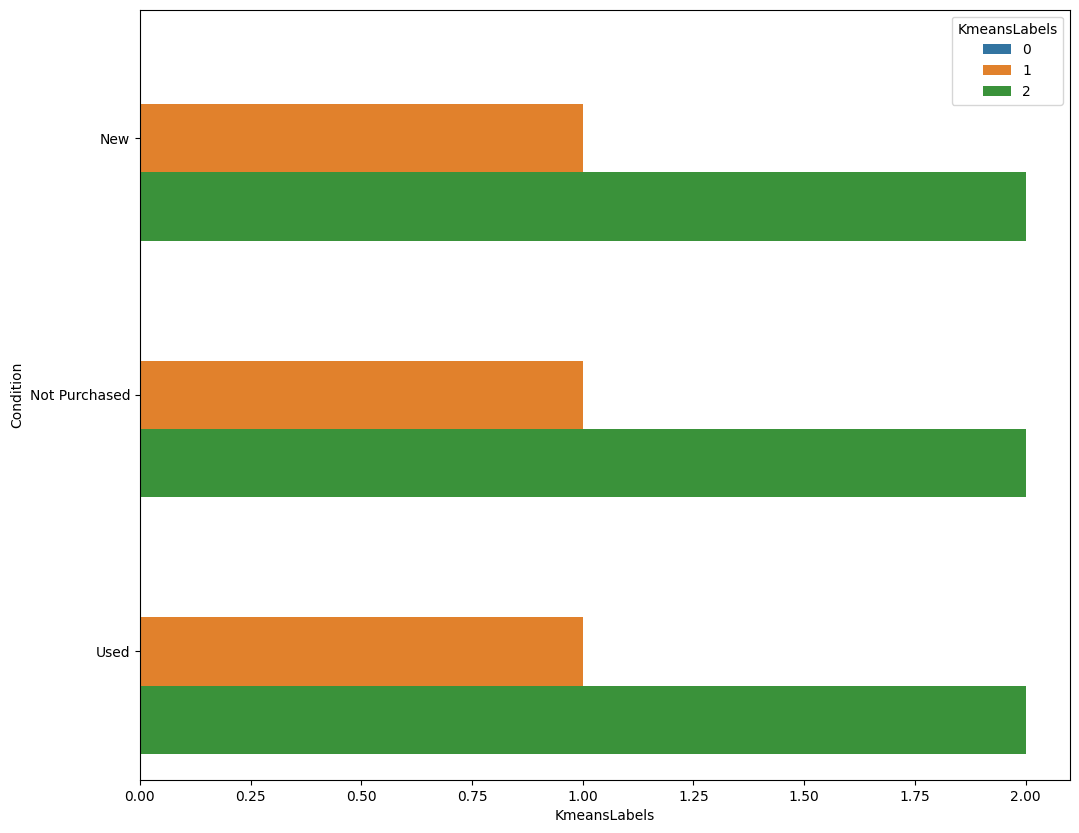

<ipython-input-41-4dc03718b380>:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




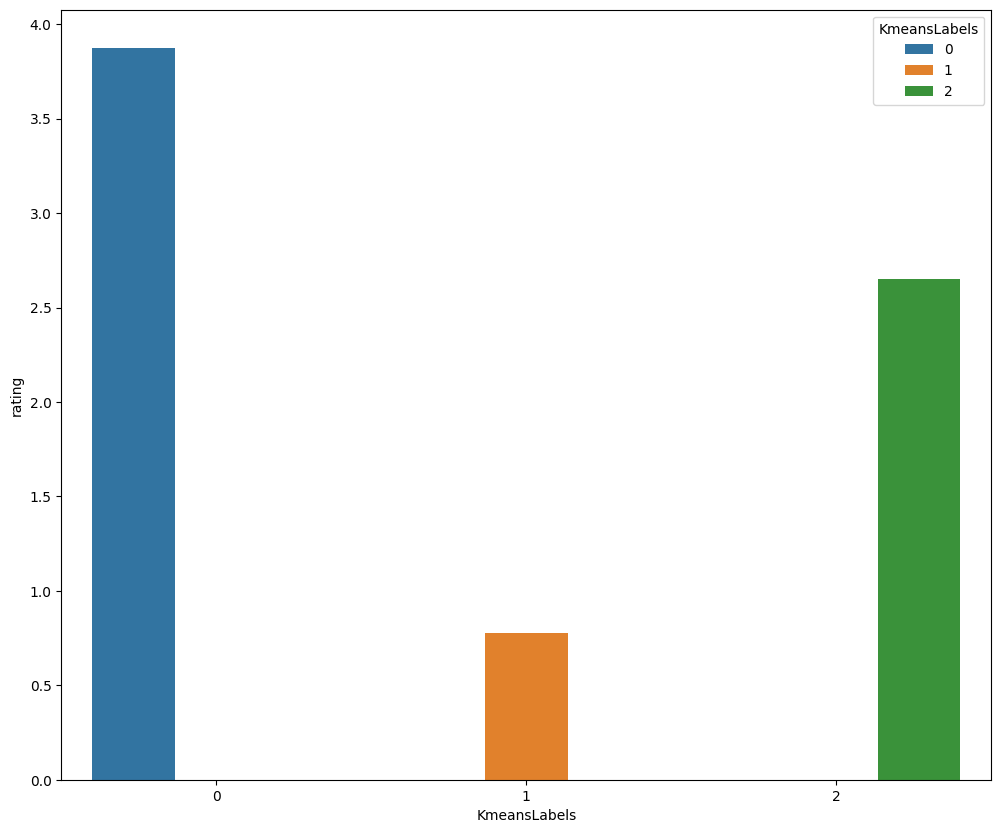

In [41]:
plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='driven',data=df, hue='KmeansLabels')
plt.show(block=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='Condition',data=df, hue='KmeansLabels')
plt.show(block=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='rating',data=df, hue='KmeansLabels', ci=False)
plt.show(block=False)

### Inference and Conclusion

The 3rd Cluster is chosen to be the target as it has the most impact on customer's perception.



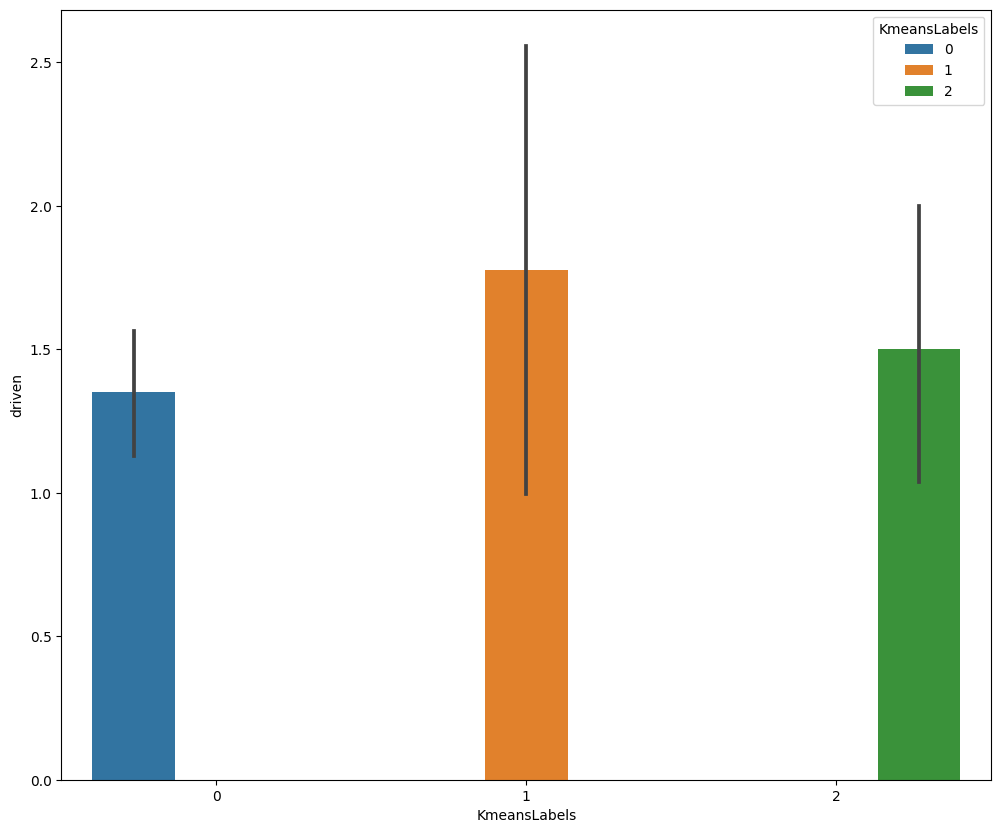

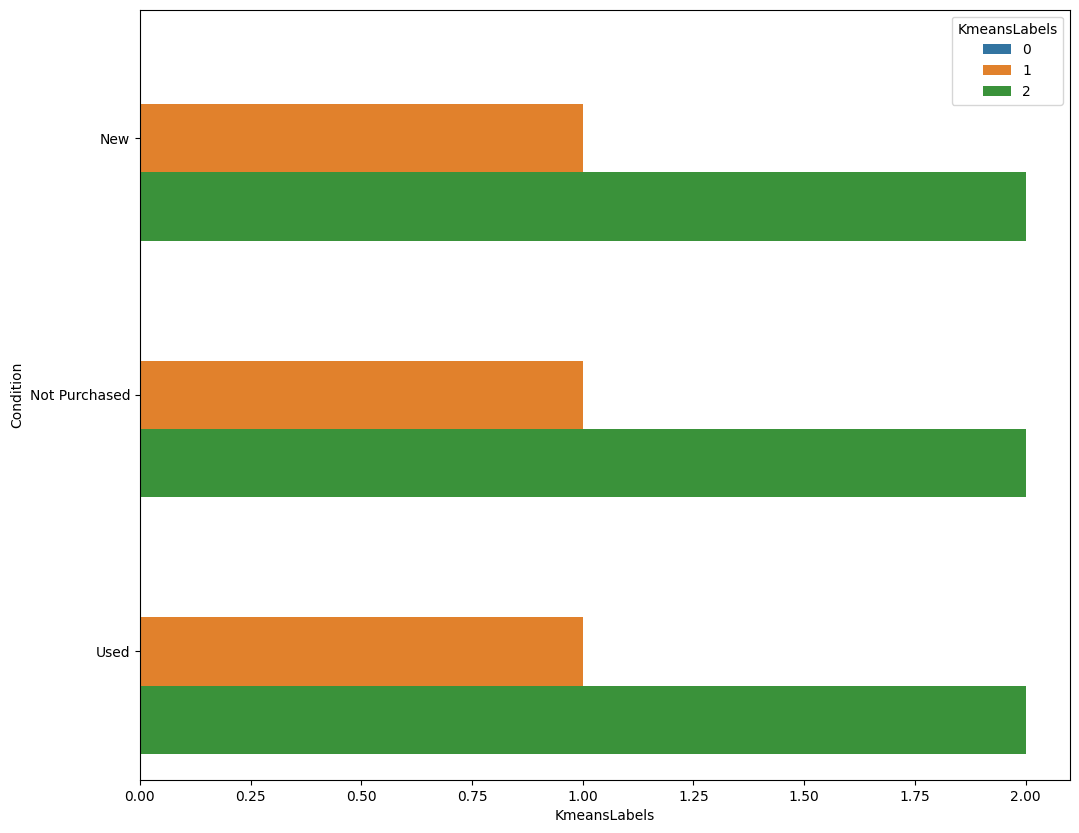

<ipython-input-35-4dc03718b380>:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




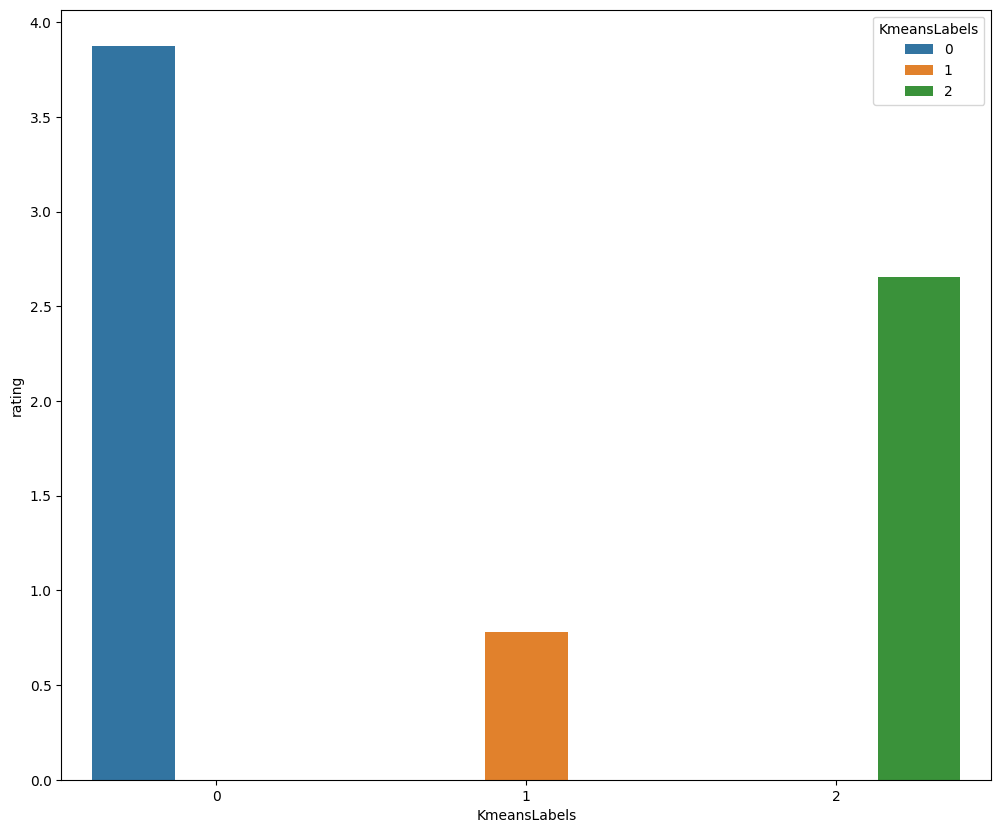

In [35]:
plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='driven',data=df, hue='KmeansLabels')
plt.show(block=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='Condition',data=df, hue='KmeansLabels')
plt.show(block=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='rating',data=df, hue='KmeansLabels', ci=False)
plt.show(block=False)